In [1]:
import os
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
pd.plotting.register_matplotlib_converters()
pd.options.display.max_rows=50
pd.options.display.max_columns=100
plt.xkcd()
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
plt.rcParams.update({'font.size':18})
sns.set_style('darkgrid')
plt.rcParams.update({'font.family':'Humor Sans'})

# My colors to be used in exploration
green1 = [22/256, 111/256, 76/256]
blue1 = [29/256, 82/256, 120/256]
green2 = [0/256, 83/256, 47/256]
blue2 = [38/256, 51/256, 86/256]
green3 = [50/256, 199/256, 127/256]
blue3 = [26/256, 196/256, 219/256]
red1 = [125/256, 25/256, 0/256]
red2 = [178/256, 24/256, 71/256]

In [73]:
df=pd.read_csv('data/grade_pred_tidy.csv',index_col=0)
df

gender branch dropper tenth_board twelvth_board coaching    coaching_city  \
1     Male   BSBE      No        CBSE          CBSE       No              NaN   
2     Male   BSBE      No        CBSE         State      Yes           Indore   
3     Male     CL      No        CBSE          CBSE      Yes            patna   
4     Male     CL      No        CBSE          CBSE      Yes            patna   
5     Male     ME      No        CBSE          CBSE      Yes         Kottayam   
..     ...    ...     ...         ...           ...      ...              ...   
376   Male     MC     Yes        CBSE          CBSE      Yes             Pune   
377   Male     ME      No        CBSE          CBSE      Yes         Kottayam   
378   Male     EP      No        CBSE          CBSE      Yes            Delhi   
379   Male     CE      No        CBSE          CBSE      Yes             Kota   
380   Male   BSBE     Yes        CBSE          CBSE       No  North Lakhimpur   

            coaching_name       home_state        home_city  fam_size  \
1                     NaN        Rajasthan          Bikaner         9   
2                   Allen   Madhya Pradesh        Maheshwar         6   
3                     vmc            bihar          sasaram         4   
4                     vmc            bihar          sasaram         4   
5                 T.I.M.E      Maharashtra         Yavatmal         5   
..                    ...              ...              ...       ...   
376              Dakshana          Gujarat           Rajkot         5   
377                  Time    Uttar pradesh         GHAZIPUR         5   
378  Pace IIT and Medical  DELHI/NEW DELHI            Delhi         4   
379                 Allen        Rajasthan             Kota         4   
380           No coaching            ASSAM  North Lakhimpur         4   

            mom_ed         dad_ed    mom_job   dad_job  \
1    Post Graduate  Post Graduate  Housewife  Business   
2         Graduate  Post Graduate  Housewife      Govt   
3        10th Pass       Graduate  Housewife  Business   
4        10th Pass       Graduate  Housewife  Business   
5        10th Pass      12th Pass  Housewife      Else   
..             ...            ...        ...       ...   
376     <10th Pass      10th Pass  Housewife      Else   
377     <10th Pass      12th Pass  Housewife      Else   
378      10th Pass      12th Pass  Housewife      Else   
379      12th Pass      12th Pass  Housewife  Business   
380      12th Pass      12th Pass    Medical      Else   

                  study_time       tech_clubs  cult_clubs       fest  \
1                  Irregular   CnA, Quiz club      Debsoc  Techniche   
2    Everyday upto 2-4 hours        CnA, Aero         NaN        NaN   
3                        NaN              CnA         NaN  Techniche   
4                        NaN              CnA         NaN  Techniche   
5    Everyday upto 0-2 hours         Robotics         NaN        NaN   
..                       ...              ...         ...        ...   
376                Irregular              FEC         NaN        NaN   
377  Everyday upto 0-2 hours  Automobile Club         NaN        NaN   
378                Irregular              NaN         NaN        NaN   
379                Irregular              NaN  Drama club        NaN   
380                Irregular              FEC     Octaves        NaN   

          hostel intra_hostel ed_loan  time_outside attendance relationship  \
1          Umiam          6-7      No          12.0  Below 90?       Single   
2         Kapili       5 to 6      No           4.0  Above 90?       Single   
3    Brahmaputra            3     Yes           2.0  Below 90?       Single   
4    Brahmaputra            3     Yes           2.0  Below 90?       Single   
5    Brahmaputra        1hour     Yes           3.0  Above 90?       Single   
..           ...          ...     ...           ...        ...          ...   
376        Barak            1     Yes  

In [5]:
for col in df.columns:
  print(f'{col:<19}: nunique - {df[col].nunique()}\tNan? - {df[col].isnull().sum()}')

gender             : nunique - 2	Nan? - 0
branch             : nunique - 10	Nan? - 0
dropper            : nunique - 2	Nan? - 0
tenth_board        : nunique - 3	Nan? - 0
twelvth_board      : nunique - 3	Nan? - 0
coaching           : nunique - 2	Nan? - 0
coaching_city      : nunique - 119	Nan? - 5
coaching_name      : nunique - 181	Nan? - 6
home_state         : nunique - 87	Nan? - 0
home_city          : nunique - 220	Nan? - 0
fam_size           : nunique - 15	Nan? - 0
mom_ed             : nunique - 5	Nan? - 1
dad_ed             : nunique - 5	Nan? - 0
mom_job            : nunique - 9	Nan? - 0
dad_job            : nunique - 8	Nan? - 0
study_time         : nunique - 3	Nan? - 2
tech_clubs         : nunique - 61	Nan? - 114
cult_clubs         : nunique - 22	Nan? - 253
fest               : nunique - 13	Nan? - 116
hostel             : nunique - 10	Nan? - 0
intra_hostel       : nunique - 69	Nan? - 0
ed_loan            : nunique - 2	Nan? - 0
time_outside       : nunique - 22	Nan? - 1
attendance   

In [74]:
%%time

#filling missing values
df.coaching_city[df.coaching_city.isnull()]='N.A'
df.coaching_name[df.coaching_name.isnull()]='N.A'
df.mom_ed[df.mom_ed.isnull()]='10th Pass'
df.study_time[df.study_time.isnull()]='N.A'
df.tech_clubs[df.tech_clubs.isnull()]='None'
df.cult_clubs[df.cult_clubs.isnull()]='None'
df.fest[df.fest.isnull()]='None'
df.time_outside[df.time_outside.isnull()]=round(df.time_outside.notnull().mean())
df.addiction[df.addiction.isnull()]='None'

#Cleaning States
df.coaching_city=df.coaching_city.str.title()
df.coaching_city=df.coaching_city.str.strip()
for val in ['none ','No coaching','0','none','-','---','None','Na','N.A.','no coaching']:
  df.coaching_city[(df.coaching_city == val)] = 'N.A'
for bad,good in [('Patna And Kota','Patna and Kota'),('Patna /Kota','Patna and Kota'),('Vijawada','Vijayawada'),('Ajmer(Rajasthan)','Ajmer'),('Hydreabad','Hyderabad'),('Vizag','Vishakapatnam'),('Banglore','Bangaluru'),('Bangalore','Bengaluru')]:
  df.coaching_city[df.coaching_city==bad]=good

for col in ['coaching_name','home_state','home_city','hostel']:
  df[col]=df[col].str.title().str.strip()

for bad,good in [(['Up'],'Uttar Pradesh'),(['Andra Pradesh','Ap','Andhra Pradhesh'],'Andhra Pradesh'),(['Tamilnadu'],'Tamil Nadu'),(['Maharshtra'],'Maharashtra'),(['Andhra And Telangana Pradesh','Telangana State','Andhra Prdesh'],'Telangana'),
                 (['Madhya Pradesg','Mp','M.P','M.P.','Bhopal','Indore','Madhya Pradhesh'],'Madhya Pradhesh'),(['Westbengal'],'West Bengal'),(['Alwar'],'Rajasthan'),(['Delhi- Ncr','Delhi/New Delhi'],'Delhi'),
                 (['Chattisgarh'],'Chhattisgarh'),(['Uttrakhand'],'Uttarakhand'),('Bokaro','Jharkhand')]:
  for worse in bad:
    df.home_state[df.home_state==worse]=good

#Exploding multivalued columns
fests=['Alcher','Techniche','Udgam','Other','None']
for fest in fests:
  df[f'fest_{fest}']=df.fest.str.contains(fest).astype('int')
df['fest_num']=df.fest.str.split(',').apply(lambda x: len(x))
df.fest_num[df.fest_None==1]=0

cults=['Debsoc','AnR','Cadence','Litsoc','Montage','Lumiere','Octaves','Drama club','Fine-Arts','None']
for club in cults:
  df[f'cult_{club}']=df.cult_clubs.str.contains(club).astype('int')
df['cult_num']=df.cult_clubs.str.split(',').apply(lambda x: len(x))
df.cult_num[df.cult_None==1]=0

techs=['CnA','Quiz club','Aero','Robotics','Coding Club','FEC','Electronics','EDC','Equinox','SWC','Automobile Club','Prakriti','None']
for club in techs:
  df[f'tech_{club}']=df.tech_clubs.str.contains(club).astype('int')
df['tech_num']=df.tech_clubs.str.split(',').apply(lambda x: len(x))
df.tech_num[df.tech_None==1]=0

addictions=['Drinking', 'Smoking', 'Weed', 'None']
for addiction in addictions:
  df[f'{addiction}?!']=df.addiction.str.contains(addiction).astype('int')

cols=['lab','tut','quiz','midsem','endsem','branch_change','attention_class','branch_interest']
df[cols]=df[cols].astype('int')

df['dad_ed'][df.dad_ed=='< 10th Pass']='<10th Pass'
df['mom_ed_dad_ed']=df['mom_ed']+"---"+df['dad_ed']

Wall time: 1.18 s
Parser   : 112 ms


In [7]:
for col in df.columns:
  print(col+':') 
  print(df[col].unique())
  print('\n')

gender:
['Male' 'Female']


branch:
['BSBE' 'CL' 'ME' 'CSE' 'CE' 'EP' 'MC' 'CST' 'ECE/EEE' 'Design']


dropper:
['No' 'Yes']


tenth_board:
['CBSE' 'ICSE' 'State']


twelvth_board:
['CBSE' 'State' 'ICSE']


coaching:
['No' 'Yes']


coaching_city:
['N.A' 'Indore' 'Patna' 'Kottayam' 'Durgapur' 'Ahmedabad' 'Bengaluru'
 'Kolkata' 'Jaipur' 'New Delhi' 'Pune' 'Jabalpur' 'Gwalior' 'Gurgaon'
 'Delhi' 'Chandigarh' 'Kota' 'Kanpur' 'Mumbai' 'Hyderabad' 'Vadodara'
 'Vijayawada' 'Ghaziabad' 'Patiala' 'Varanasi' 'Mangalore' 'Chennai'
 'Patna and Kota' 'Aurangabad' 'Jamshedpur' 'Kalyan' 'Mathura' 'Mysore'
 'No Coaching' 'Lucknow' 'Udaipur' 'Amritsar' 'Nagpur' 'Ranchi' 'Nashik'
 'Bihar' 'Guwahati' 'Jodhpur' 'Rohini' 'Bokaro' 'Sikar' 'Ajmer'
 'Telangana' 'Bhopal' 'Thrissur' 'Bhubaneswar' 'Bundi' 'Velivennu'
 'Amravati' 'Visakhapatnam' 'Gorakhpur' 'Latur' 'Allahabed' 'Rewari'
 'Gurugram' 'Ahmedpur' 'Bhoal' 'Raipur' 'Kochi' 'Rajahmundry' 'Jorhat'
 'Burhanpur' 'Rohtak' 'Thane' 'Guntur' 'Vishakapatnam' 'Bh


fest_Alcher:
[0 1]


fest_Techniche:
[1 0]


fest_Udgam:
[0 1]


fest_Other:
[0 1]


fest_None:
[0 1]


fest_num:
[1 0 2 3 4]


cult_Debsoc:
[1 0]


cult_AnR:
[0 1]


cult_Cadence:
[0 1]


cult_Litsoc:
[0 1]


cult_Montage:
[0 1]


cult_Lumiere:
[0 1]


cult_Octaves:
[0 1]


cult_Drama club:
[0 1]


cult_Fine-Arts:
[0 1]


cult_None:
[0 1]


cult_num:
[1 0 2 9]


tech_CnA:
[1 0]


tech_Quiz club:
[1 0]


tech_Aero:
[0 1]


tech_Robotics:
[0 1]


tech_Coding Club:
[0 1]


tech_FEC:
[0 1]


tech_Electronics:
[0 1]


tech_EDC:
[0 1]


tech_Equinox:
[0 1]


tech_SWC:
[0 1]


tech_Automobile Club:
[0 1]


tech_Prakriti:
[0 1]


tech_None:
[0 1]


tech_num:
[ 2  1  3  4  0 11  5]


Drinking?!:
[0 1]


Smoking?!:
[0 1]


Weed?!:
[0 1]


None?!:
[1 0]


mom_ed_dad_ed:
['Post Graduate---Post Graduate' 'Graduate---Post Graduate'
 '10th Pass---Graduate' '10th Pass---12th Pass' 'Post Graduate---Graduate'
 '10th Pass---Post Graduate' 'Graduate---Graduate' '12th Pass---12th Pass'
 '12th Pass---Grad

In [8]:
df

gender branch dropper tenth_board twelvth_board coaching    coaching_city  \
1     Male   BSBE      No        CBSE          CBSE       No              N.A   
2     Male   BSBE      No        CBSE         State      Yes           Indore   
3     Male     CL      No        CBSE          CBSE      Yes            Patna   
4     Male     CL      No        CBSE          CBSE      Yes            Patna   
5     Male     ME      No        CBSE          CBSE      Yes         Kottayam   
..     ...    ...     ...         ...           ...      ...              ...   
376   Male     MC     Yes        CBSE          CBSE      Yes             Pune   
377   Male     ME      No        CBSE          CBSE      Yes         Kottayam   
378   Male     EP      No        CBSE          CBSE      Yes            Delhi   
379   Male     CE      No        CBSE          CBSE      Yes             Kota   
380   Male   BSBE     Yes        CBSE          CBSE       No  North Lakhimpur   

            coaching_name      home_state        home_city  fam_size  \
1                     N.A       Rajasthan          Bikaner         9   
2                   Allen  Madhya Pradesh        Maheshwar         6   
3                     Vmc           Bihar          Sasaram         4   
4                     Vmc           Bihar          Sasaram         4   
5                 T.I.M.E     Maharashtra         Yavatmal         5   
..                    ...             ...              ...       ...   
376              Dakshana         Gujarat           Rajkot         5   
377                  Time   Uttar Pradesh         Ghazipur         5   
378  Pace Iit And Medical           Delhi            Delhi         4   
379                 Allen       Rajasthan             Kota         4   
380           No Coaching           Assam  North Lakhimpur         4   

            mom_ed         dad_ed    mom_job   dad_job  \
1    Post Graduate  Post Graduate  Housewife  Business   
2         Graduate  Post Graduate  Housewife      Govt   
3        10th Pass       Graduate  Housewife  Business   
4        10th Pass       Graduate  Housewife  Business   
5        10th Pass      12th Pass  Housewife      Else   
..             ...            ...        ...       ...   
376     <10th Pass      10th Pass  Housewife      Else   
377     <10th Pass      12th Pass  Housewife      Else   
378      10th Pass      12th Pass  Housewife      Else   
379      12th Pass      12th Pass  Housewife  Business   
380      12th Pass      12th Pass    Medical      Else   

                  study_time       tech_clubs  cult_clubs       fest  \
1                  Irregular   CnA, Quiz club      Debsoc  Techniche   
2    Everyday upto 2-4 hours        CnA, Aero        None       None   
3                        N.A              CnA        None  Techniche   
4                        N.A              CnA        None  Techniche   
5    Everyday upto 0-2 hours         Robotics        None       None   
..                       ...              ...         ...        ...   
376                Irregular              FEC        None       None   
377  Everyday upto 0-2 hours  Automobile Club        None       None   
378                Irregular             None        None       None   
379                Irregular             None  Drama club       None   
380                Irregular              FEC     Octaves       None   

          hostel intra_hostel ed_loan  time_outside attendance relationship  \
1          Umiam          6-7      No          12.0  Below 90?       Single   
2         Kapili       5 to 6      No           4.0  Above 90?       Single   
3    Brahmaputra            3     Yes           2.0  Below 90?       Single   
4    Brahmaputra            3     Yes           2.0  Below 90?       Single   
5    Brahmaputra        1hour     Yes           3.0  Above 90?       Single   
..           ...          ...     ...           ...        ...          ...   
376        Barak            1     Yes           3.0

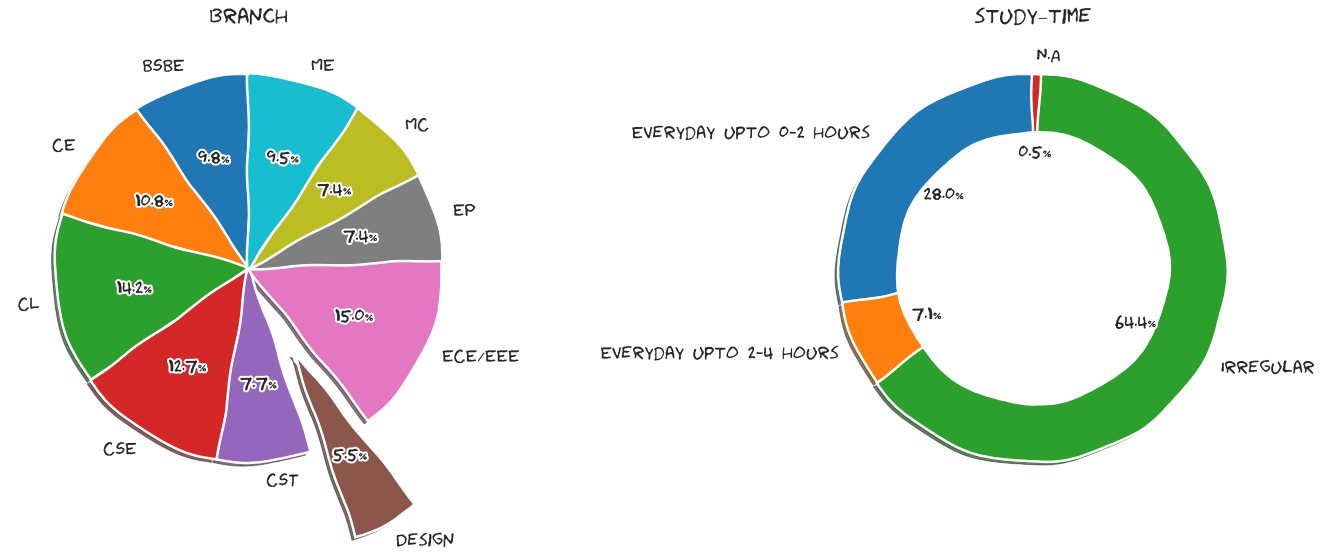

In [9]:
fig,axes=plt.subplots(ncols=2,figsize=(20,8)) 
# plt.tight_layout()

data=df.groupby('branch').count().iloc[:,1]
axes[0].pie(data,labels=data.index,autopct='%1.1f%%',shadow=True,startangle=90,explode=(0,0,0,0,0,0.5,0,0,0,0)) 
axes[0].set_title('branch')

data=df.groupby('study_time').count().iloc[:,1] 
axes[1].pie(data,labels=data.index,autopct='%1.1f%%',shadow=True,startangle=90) 
axes[1].set_title('study_time')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)# Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()

In [10]:
df.columns

Index(['gender', 'branch', 'dropper', 'tenth_board', 'twelvth_board',
       'coaching', 'coaching_city', 'coaching_name', 'home_state', 'home_city',
       'fam_size', 'mom_ed', 'dad_ed', 'mom_job', 'dad_job', 'study_time',
       'tech_clubs', 'cult_clubs', 'fest', 'hostel', 'intra_hostel', 'ed_loan',
       'time_outside', 'attendance', 'relationship', 'tv_time', 'library',
       'sleep_time', 'sleep_duration', 'sleep_day', 'addiction', 'ta_relation',
       'lab', 'tut', 'quiz', 'midsem', 'endsem', 'branch_change',
       'attention_class', 'study_preference', 'material_preference',
       'branch_interest', 'core', 'cpi', 'fest_Alcher', 'fest_Techniche',
       'fest_Udgam', 'fest_Other', 'fest_None', 'fest_num', 'cult_Debsoc',
       'cult_AnR', 'cult_Cadence', 'cult_Litsoc', 'cult_Montage',
       'cult_Lumiere', 'cult_Octaves', 'cult_Drama club', 'cult_Fine-Arts',
       'cult_None', 'cult_num', 'tech_CnA', 'tech_Quiz club', 'tech_Aero',
       'tech_Robotics', 'tech_Coding Cl

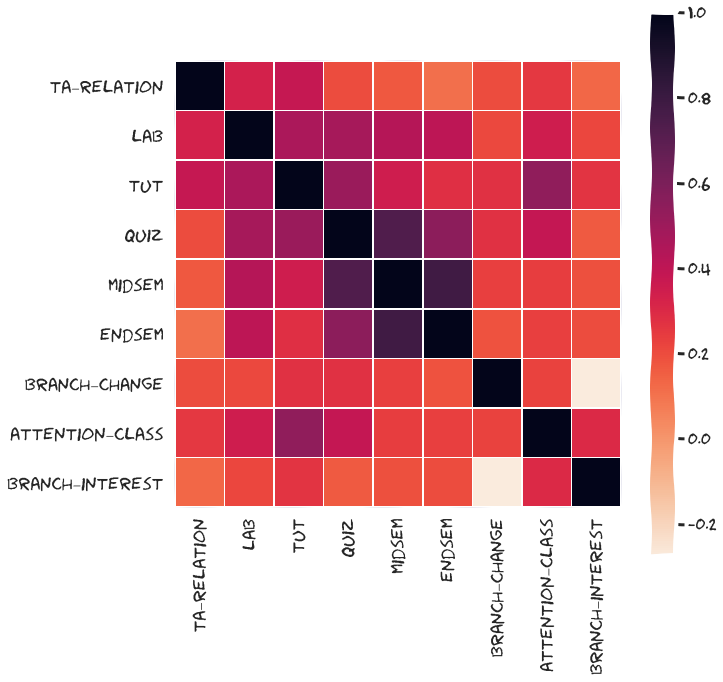

In [11]:
corr_columns=['ta_relation',
       'lab', 'tut', 'quiz', 'midsem', 'endsem', 'branch_change',
       'attention_class','branch_interest']
corr=df[corr_columns].corr()

plt.subplots(figsize=(10,10))
sns.heatmap(corr, linewidths=0.5, cmap=sns.cm.rocket_r,square=True)

In [12]:
cult_cols=[f'cult_{club}' for club in cults]
tech_cols=[f'tech_{club}' for club in techs]
fest_cols=[f'fest_{fest}' for fest in fests]
addict_cols=[f'{adn}?!' for adn in addictions]

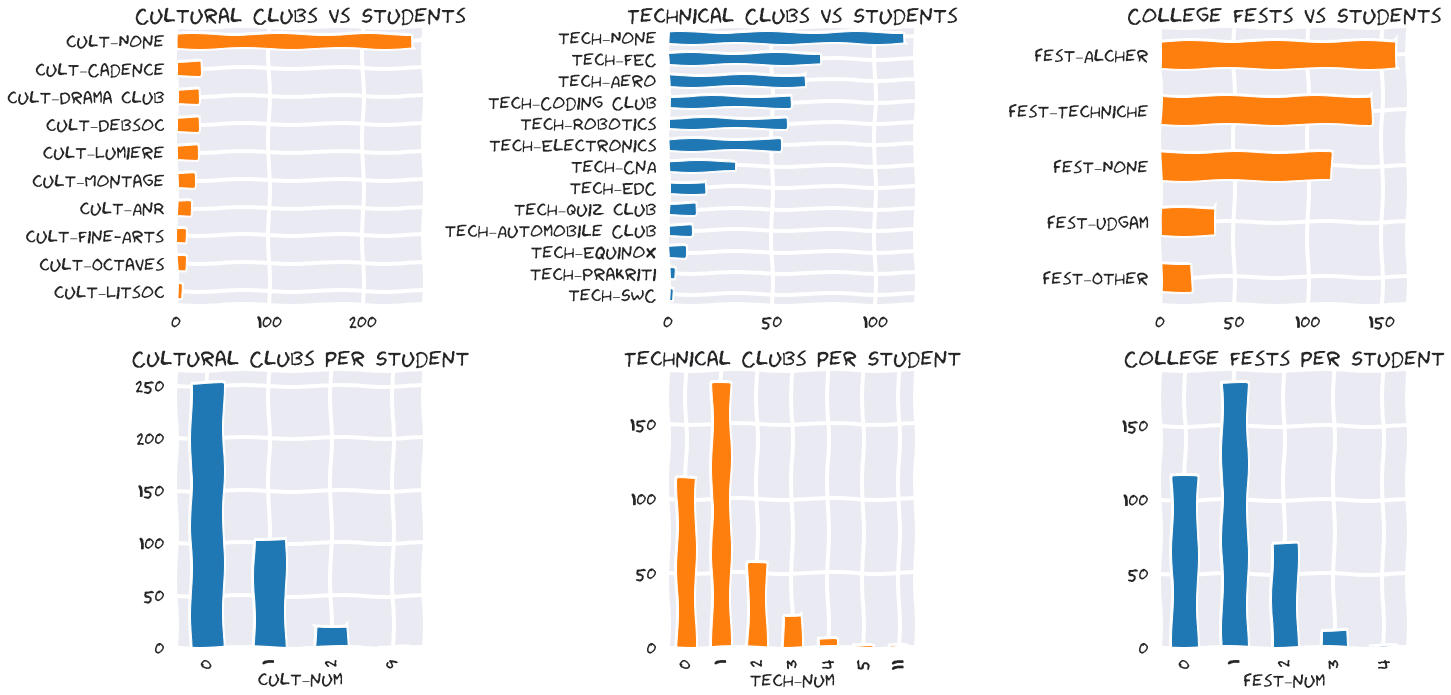

In [13]:
fig,ax=plt.subplots(nrows=2,ncols=3,figsize=(20,10))
# plt.tight_layout()

tdf=df[cult_cols].sum().sort_values(ascending=True)
tdf.plot.barh(ax=ax[0,0], color='#ff7f0e')

df[tech_cols].sum().sort_values().plot.barh(ax=ax[0,1])
df[fest_cols].sum().sort_values().plot.barh(ax=ax[0,2], color='#ff7f0e')

df.groupby('cult_num').count().iloc[:,0].plot.bar(ax=ax[1,0])
df.groupby('tech_num').count().iloc[:,0].plot.bar(ax=ax[1,1],color='#ff7f0e')
df.groupby('fest_num').count().iloc[:,0].plot.bar(ax=ax[1,2])

ax[0,0].set_title('Cultural Clubs vs Students')
ax[0,1].set_title('Technical Clubs vs Students')
ax[0,2].set_title('College Fests vs Students')

ax[1,0].set_title('Cultural Clubs per Student')
ax[1,1].set_title('Technical Clubs per Student')
ax[1,2].set_title('College Fests per Student')


plt.tight_layout()

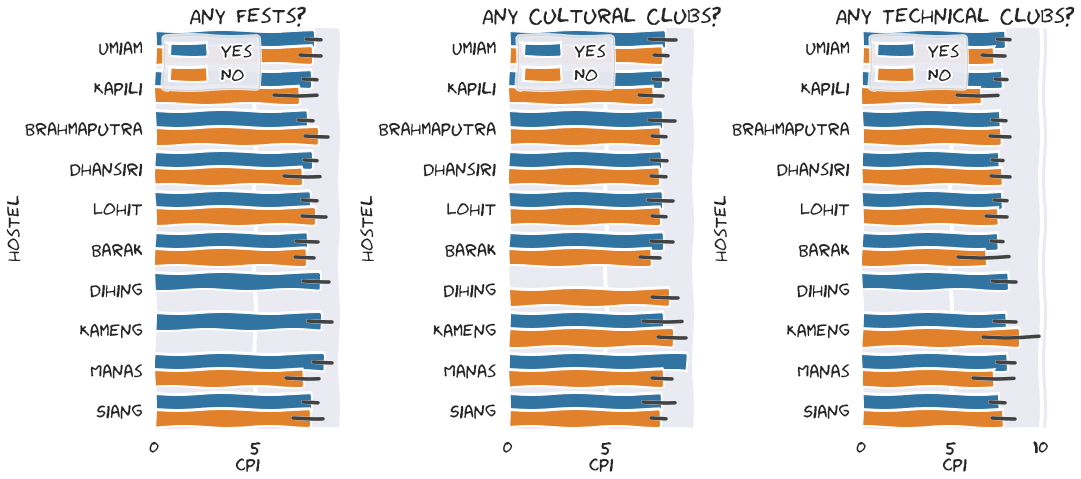

In [14]:
tdf=df.groupby('hostel')['cpi']
# sns.barplot(y=tdf.mean().index,x=tdf.mean().values)
fig,ax=plt.subplots(ncols=3,figsize=(15,7))
sns.barplot(y='hostel',x='cpi',data=df,hue='fest_None',ax=ax[0])
handles,_=ax[0].get_legend_handles_labels()
ax[0].legend(handles=handles,labels=['Yes','No'], loc=2)
ax[0].set_title('Any Fests?')

sns.barplot(y='hostel',x='cpi',data=df,hue='cult_None',ax=ax[1])
handles,_=ax[1].get_legend_handles_labels()
ax[1].legend(handles=handles,labels=['Yes','No'], loc=2)
ax[1].set_title('Any Cultural Clubs?')

sns.barplot(y='hostel',x='cpi',data=df,hue='tech_None',ax=ax[2])
handles,_=ax[2].get_legend_handles_labels()
ax[2].legend(handles=handles,labels=['Yes','No'], loc=2)
ax[2].set_title('Any Technical Clubs?')

plt.tight_layout()

Text(0.5, 1.0, 'Distribution of CPI; Freshmen Year IITG')

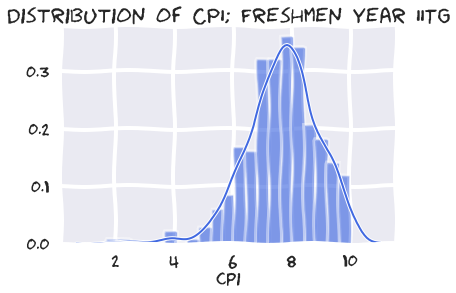

In [84]:
sns.distplot(df.cpi,color='royalblue');
plt.title('Distribution of CPI; Freshmen Year IITG')

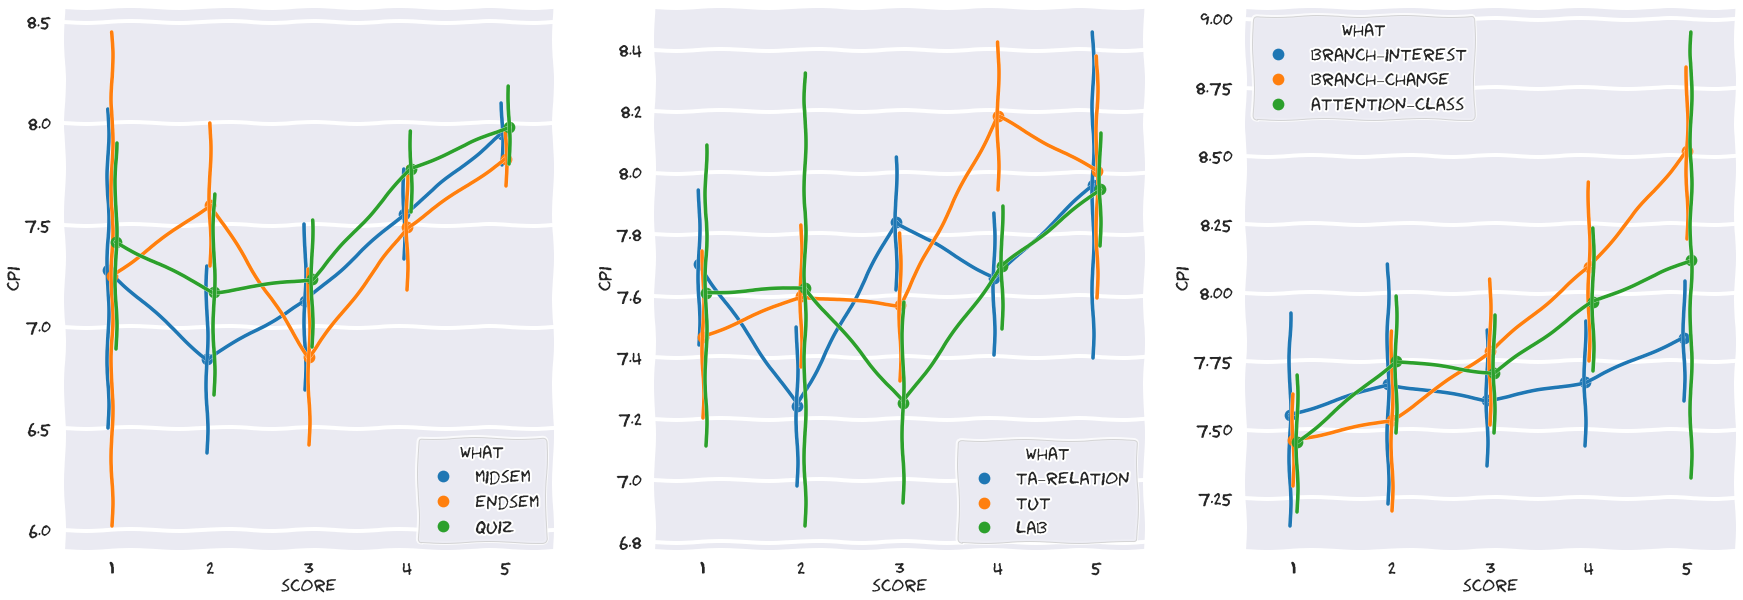

In [15]:
def superpointplot(feats,axes=None,transpose=False,order=None):
    df_list=[]
    for feat in feats:
      tdf=df[[feat,'cpi']]
      tdf.columns=['score','cpi']
      tdf['what']=feat
      df_list.append(tdf);
    tdf=pd.concat(df_list)
    if transpose: return sns.pointplot(data=tdf,x='cpi',y='score',hue='what',dodge=True,ax=axes,order=order)
    else: return sns.pointplot(data=tdf,y='cpi',x='score',hue='what',dodge=True,ax=axes,order=order)

fig,axes=plt.subplots(ncols=3,figsize=(30,10))

df_list=[]
for feat in ['midsem','endsem','quiz']:
  tdf=df[[feat,'cpi']]
  tdf.columns=['score','cpi']
  tdf['what']=feat
  df_list.append(tdf);
tdf=pd.concat(df_list)
sns.pointplot(data=tdf,y='cpi',x='score',hue='what',dodge=True,ax=axes[0])

df_list=[]
for feat in ['ta_relation','tut','lab']:
  tdf=df[[feat,'cpi']]
  tdf.columns=['score','cpi']
  tdf['what']=feat
  df_list.append(tdf);
tdf=pd.concat(df_list)
sns.pointplot(data=tdf,y='cpi',x='score',hue='what',dodge=True, ax=axes[1])
# plt.legend(loc=0)

df_list=[]
for feat in ['branch_interest','branch_change','attention_class']:
  tdf=df[[feat,'cpi']]
  tdf.columns=['score','cpi']
  tdf['what']=feat
  df_list.append(tdf);
tdf=pd.concat(df_list)
sns.pointplot(data=tdf,y='cpi',x='score',hue='what',dodge=True, ax=axes[2])

Text(0.5, 1.0, 'Relationship Status')

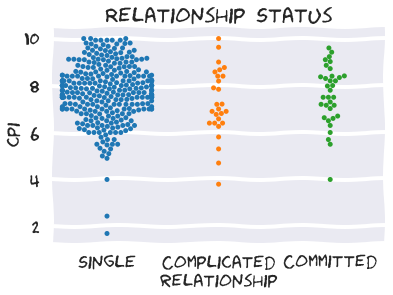

In [16]:
sns.swarmplot(y='cpi',x='relationship',data=df)
plt.title('Relationship Status')

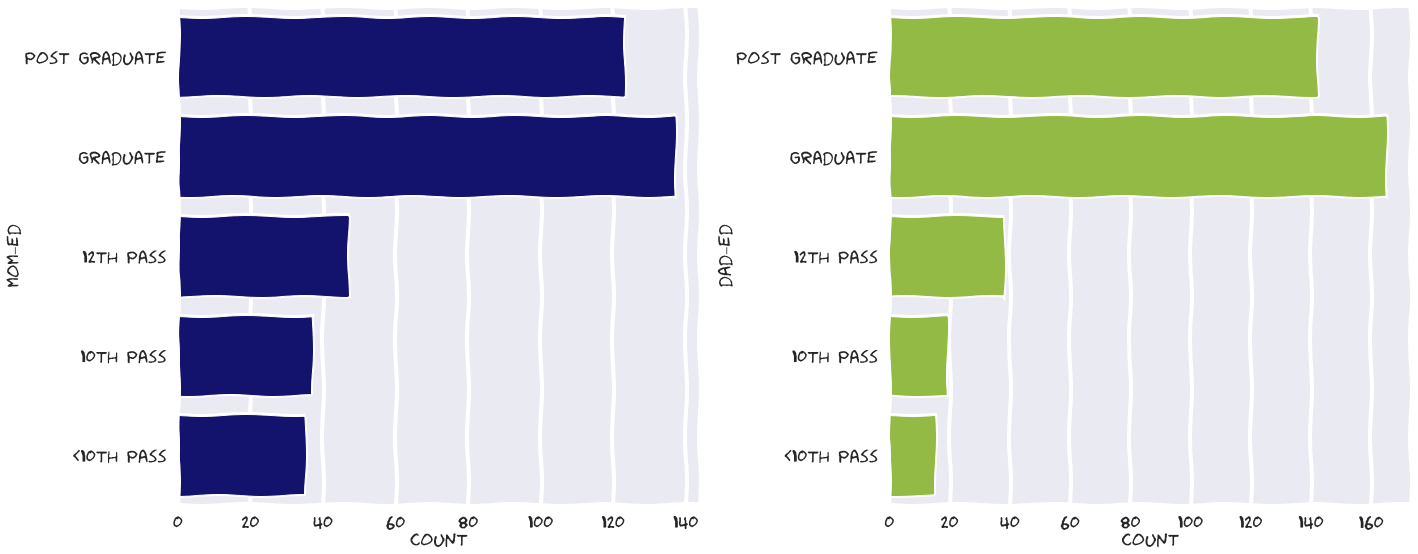

In [79]:
fig,ax=plt.subplots(ncols=2,figsize=(20,8))
sns.countplot(data=df,y='mom_ed',saturation=0.7,ax=ax[0],color='navy',order=['<10th Pass','10th Pass','12th Pass','Graduate','Post Graduate'][::-1])
sns.countplot(data=df,y='dad_ed',ax=ax[1],color='yellowgreen',order=['<10th Pass','10th Pass','12th Pass','Graduate','Post Graduate'][::-1])
plt.tight_layout(pad=1)

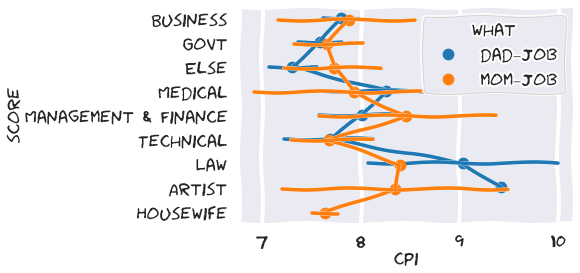

In [77]:
# sns.pointplot(data=df,y='mom_ed',x='cpi',order=['<10th Pass','10th Pass','12th Pass','Graduate','Post Graduate'][::-1])
superpointplot(['dad_job','mom_job'],transpose=True,
#                order=['<10th Pass','10th Pass','12th Pass','Graduate','Post Graduate'][::-1]
              )

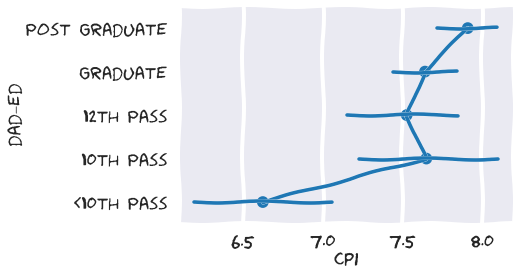

In [19]:
sns.pointplot(data=df,y='dad_ed',x='cpi',order=['<10th Pass','10th Pass','12th Pass','Graduate','Post Graduate'][::-1])

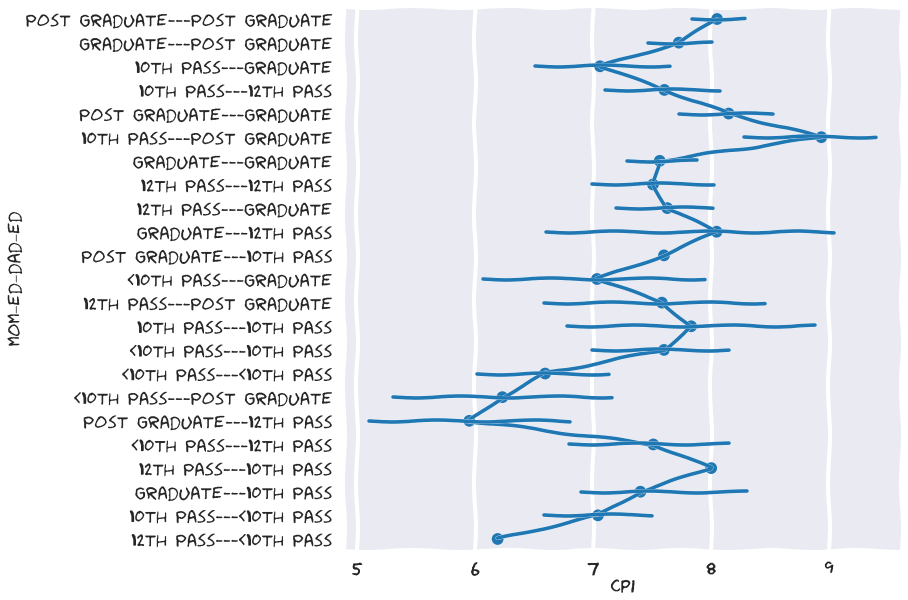

In [20]:
fig,ax=plt.subplots(figsize=(10,10))
sns.pointplot(data=df,y='mom_ed_dad_ed',x='cpi',ax=ax)

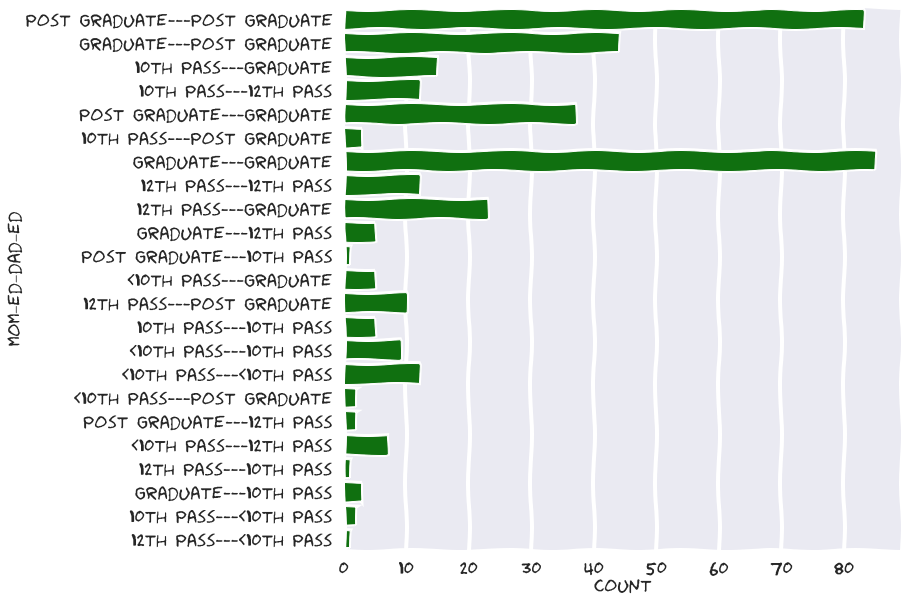

In [21]:
fig,ax=plt.subplots(figsize=(10,10))
sns.countplot(data=df,y='mom_ed_dad_ed',ax=ax,color='green')

In [22]:
tdf=df.groupby('mom_ed_dad_ed').count().iloc[:,0].sort_values(ascending=False)
# tdf['Other']=tdf[tdf<10].sum()
# tdf=tdf[tdf>=10]
# tdf.plot.barh()
tdf[tdf<10].index
for col in tdf[tdf<10].index:
    df['mom_ed_dad_ed'][df.mom_ed_dad_ed==col]='Other'

In [23]:
df.mom_ed_dad_ed.unique()

array(['Post Graduate---Post Graduate', 'Graduate---Post Graduate',
       '10th Pass---Graduate', '10th Pass---12th Pass',
       'Post Graduate---Graduate', 'Other', 'Graduate---Graduate',
       '12th Pass---12th Pass', '12th Pass---Graduate',
       '12th Pass---Post Graduate', '<10th Pass---<10th Pass'],
      dtype=object)

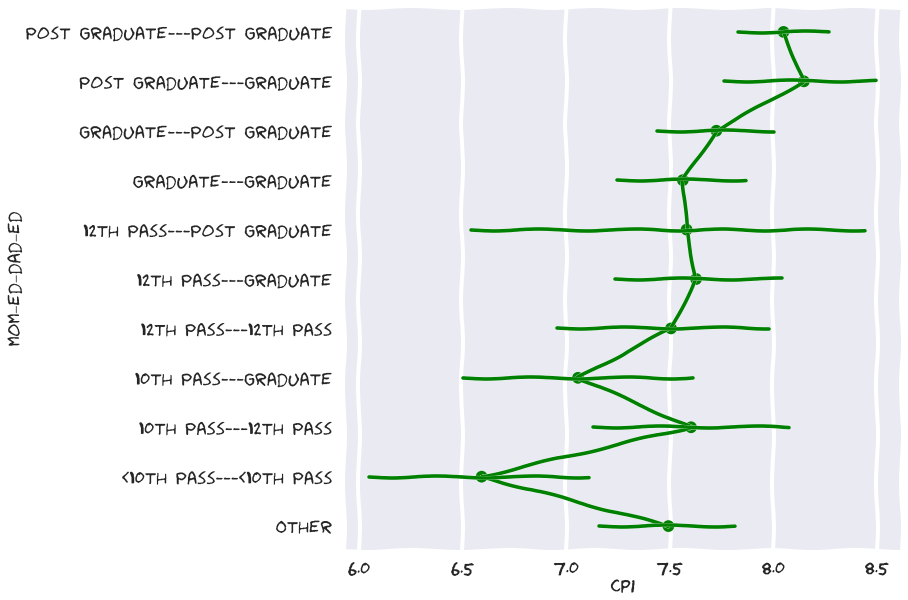

In [24]:
fig,ax=plt.subplots(figsize=(10,10))
sns.pointplot(data=df,y='mom_ed_dad_ed',x='cpi',ax=ax,order=['Post Graduate---Post Graduate','Post Graduate---Graduate','Graduate---Post Graduate','Graduate---Graduate',
                                                            '12th Pass---Post Graduate','12th Pass---Graduate','12th Pass---12th Pass','10th Pass---Graduate','10th Pass---12th Pass',
                                                            '<10th Pass---<10th Pass','Other'],color='green')

In [25]:
def extracurri(cols):
    tdf=pd.Series()
    for col in cols:
        tdf[col]=df[df[col]==1]['cpi'].mean()
    return tdf

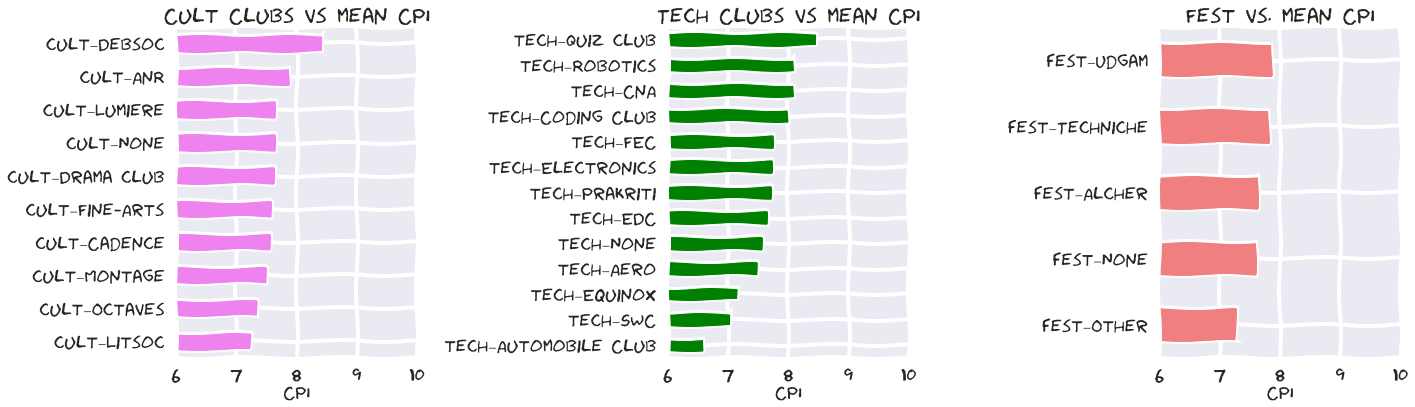

In [26]:
fig,ax=plt.subplots(figsize=(20,6),ncols=3)

tdf=extracurri(cult_cols)
tdf.sort_values().plot.barh(ax=ax[0],color='violet')
ax[0].set_xlim(6,10)
ax[0].set_title('Cult Clubs vs mean CPI')

tdf=extracurri(tech_cols)
tdf.sort_values().plot.barh(ax=ax[1],color='green')
ax[1].set_xlim(6,10)
ax[1].set_title('Tech Clubs vs mean CPI')

tdf=extracurri(fest_cols)
tdf.sort_values().plot.barh(ax=ax[2],color='lightcoral')
ax[2].set_xlim(6,10)
ax[2].set_title('Fest vs. mean CPI')

for i in range(3):
    ax[i].set_xlabel('CPI')

# tdf=extracurri(tech_cols)
plt.tight_layout()

In [27]:
df[df['cult_AnR']==1]['cpi']

6      9.19
29     6.50
54     8.10
68     9.63
76     8.10
79     7.23
81     9.41
109    6.90
169    8.20
212    8.00
316    7.90
326    9.20
341    6.00
342    7.50
374    6.17
Name: cpi, dtype: float64

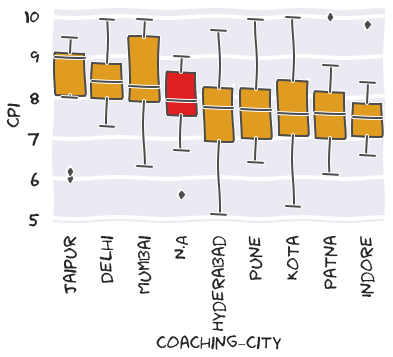

In [28]:
ordering=df.groupby('coaching_city')['cpi'].median().sort_values(ascending=False).index
ordering=[city for city in ordering if (df['coaching_city'].value_counts()[city]>10)]
hue_ordering=['orange']*9
hue_ordering[3]='red'
sns.boxplot(data=df,y='cpi',x='coaching_city',order=ordering,palette=hue_ordering);
plt.xticks(rotation=90);

Text(0.5, 0, 'Coaching Name (4 or more people)')

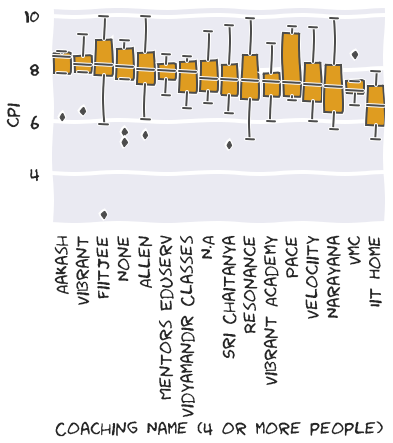

In [75]:
#had lot of clutter but only on low frequency classes
ordering=df.groupby('coaching_name')['cpi'].median().sort_values(ascending=False).index
ordering=[city for city in ordering if (df['coaching_name'].value_counts()[city]>3)]
hue_ordering=['orange']*9
# hue_ordering[3]='red'
sns.boxplot(data=df,y='cpi',x='coaching_name',order=ordering,palette=hue_ordering);
plt.xticks(rotation=90);
plt.xlabel('Coaching Name (4 or more people)')

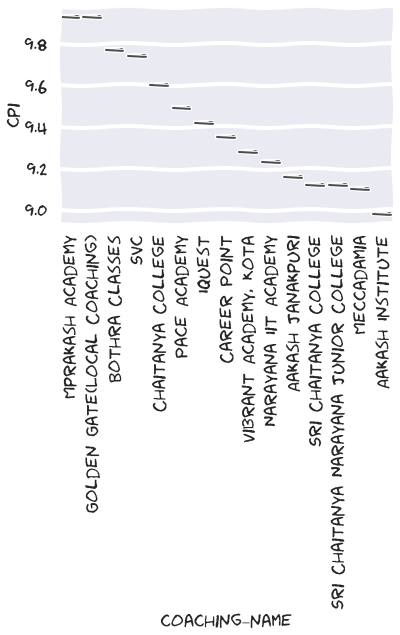

In [76]:
#had lot of clutter but only on low frequency classes
ordering=df.groupby('coaching_name')['cpi'].median().sort_values(ascending=False)[:15].index
# ordering=[city for city in ordering if (df['coaching_name'].value_counts()[city]>3)]
hue_ordering=['orange']*9
# hue_ordering[3]='red'
sns.boxplot(data=df,y='cpi',x='coaching_name',order=ordering,palette=hue_ordering);
plt.xticks(rotation=90);

In [31]:
with pd.option_context('display.max_rows',None): 
    display(df.coaching_name.value_counts())

Fiitjee                                  50
Allen                                    46
Resonance                                34
Sri Chaitanya                            14
None                                     12
Narayana                                 10
Vibrant Academy                           8
Vibrant                                   7
N.A                                       6
Vidyamandir Classes                       6
Pace                                      5
Mentors Eduserv                           4
Aakash                                    4
Velociity                                 4
Iit Home                                  4
Vmc                                       4
Motion                                    3
Kalpvriksha                               3
-                                         3
Nucleus Education                         3
Rao Iit                                   3
Iitians Pace                              3
Reso                            

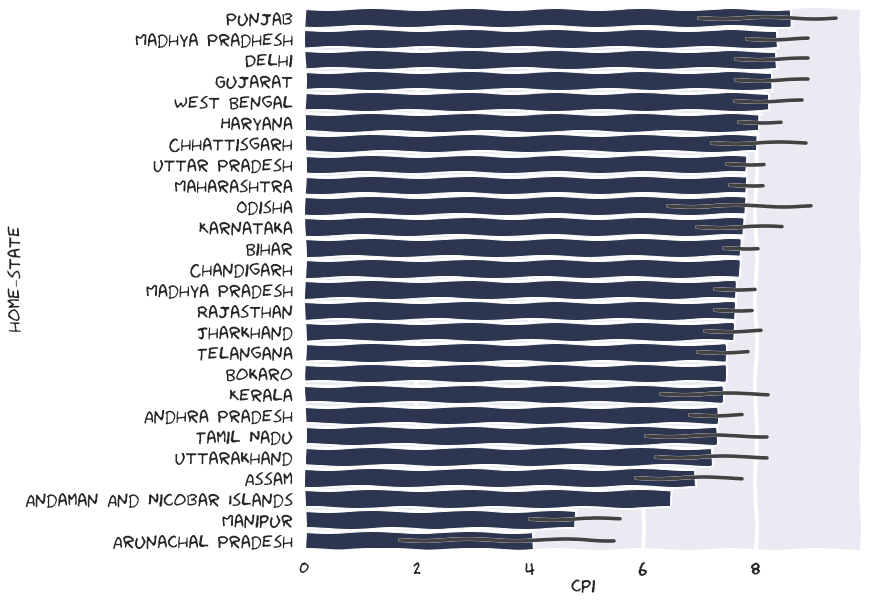

In [32]:
fig,ax=plt.subplots(figsize=(10,10))
sns.barplot(data=df,y='home_state',x='cpi',ax=ax,color=blue2,order=df.groupby('home_state')['cpi'].mean().sort_values(ascending=False).index);

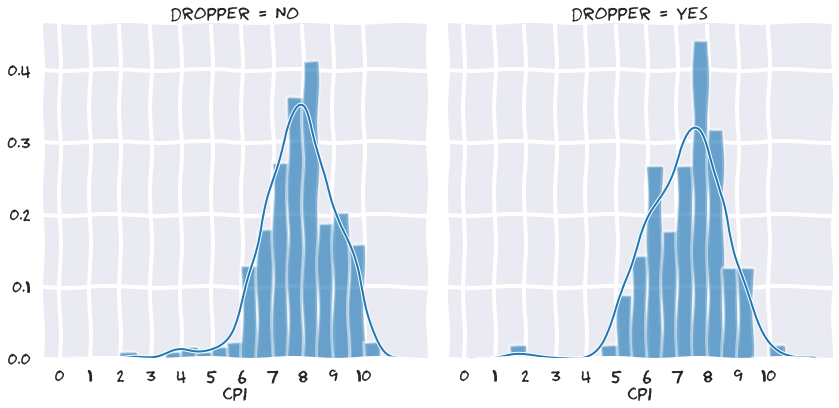

In [33]:
# fig,ax=plt.subplots(ncols=2,figsize=(10,10))
bin_edges=np.arange(0,10+1,0.5)
sns.FacetGrid(data=df,col='dropper',size=6).map(sns.distplot,'cpi',bins=bin_edges);
plt.xticks(range(10+1));

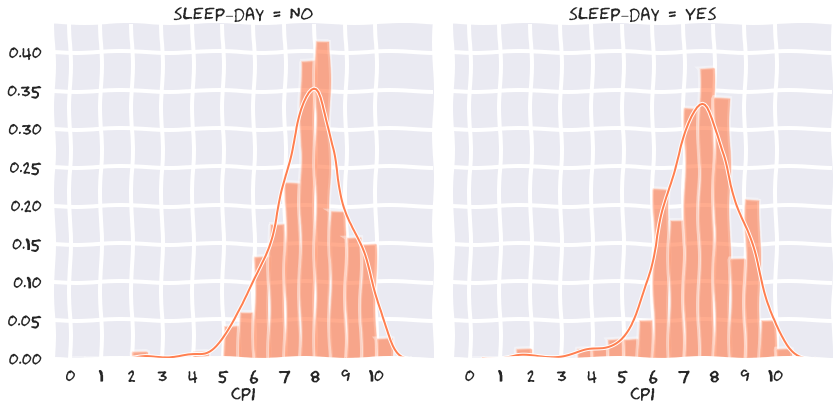

In [34]:
bin_edges=np.arange(0,10+1,0.5)
sns.FacetGrid(data=df,col='sleep_day',size=6).map(sns.distplot,'cpi',bins=bin_edges,color='coral');
plt.xticks(range(10+1));

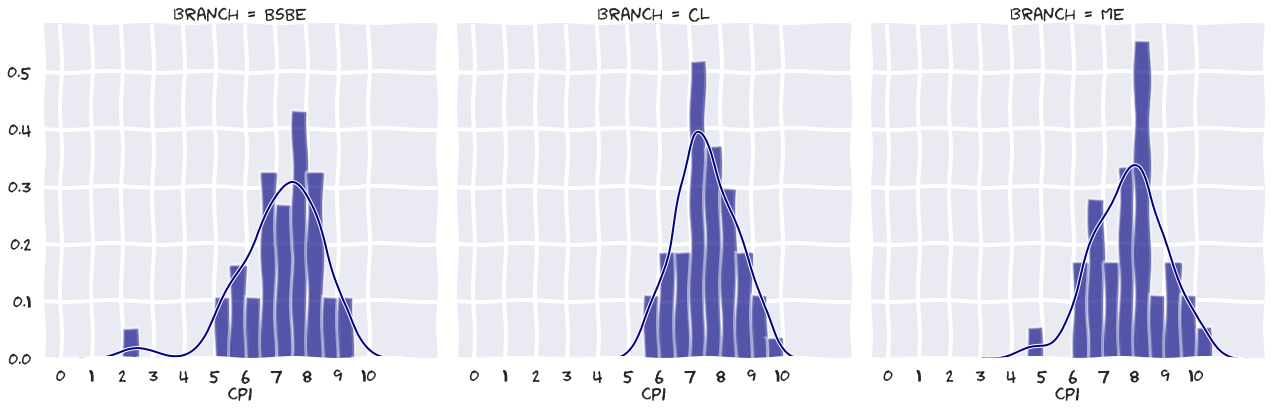

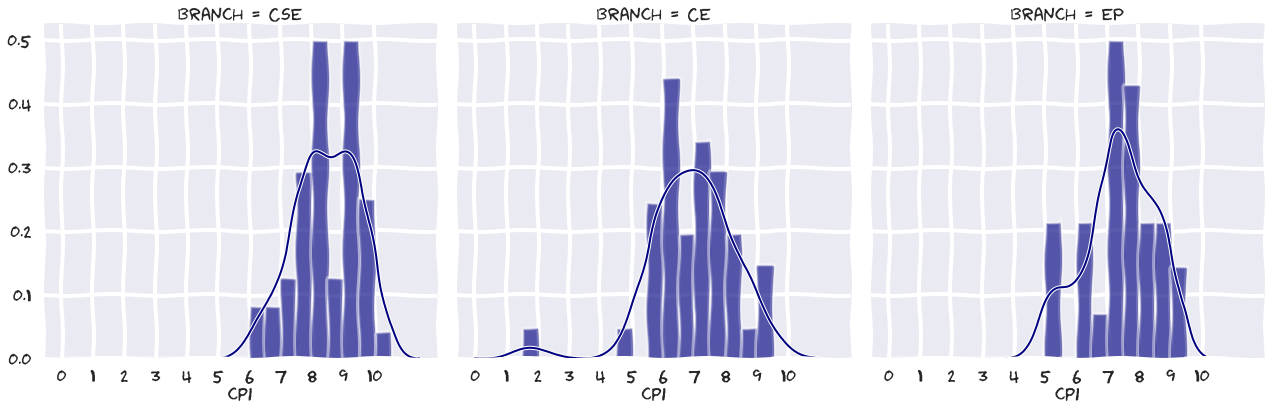

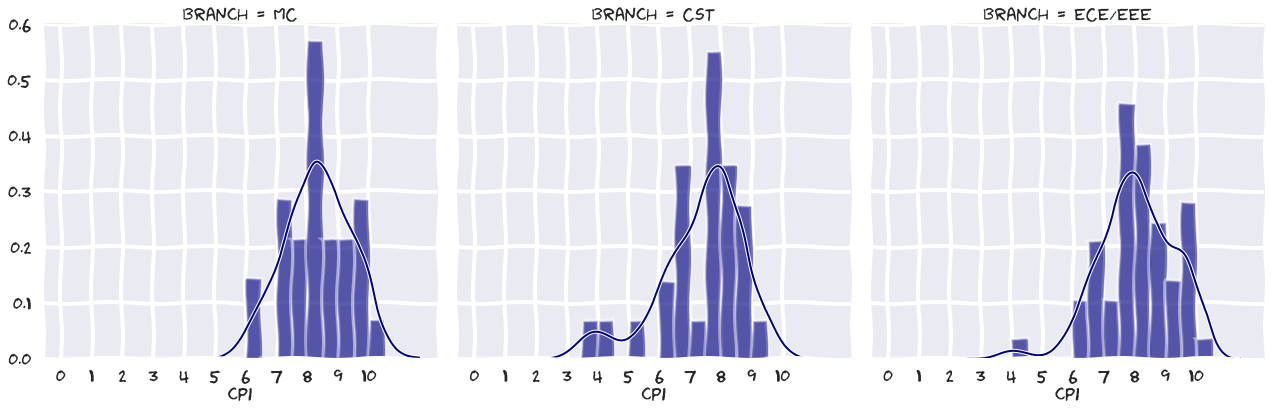

In [35]:
bin_edges=np.arange(0,10+1,0.5)
sns.FacetGrid(data=df[df.branch.isin(df.branch.unique()[:3])],col='branch',size=6).map(sns.distplot,'cpi',bins=bin_edges,color='navy');
plt.xticks(range(10+1));

bin_edges=np.arange(0,10+1,0.5)
sns.FacetGrid(data=df[df.branch.isin(df.branch.unique()[3:6])],col='branch',size=6).map(sns.distplot,'cpi',bins=bin_edges,color='navy');
plt.xticks(range(10+1));

bin_edges=np.arange(0,10+1,0.5)
sns.FacetGrid(data=df[df.branch.isin(df.branch.unique()[6:9])],col='branch',size=6).map(sns.distplot,'cpi',bins=bin_edges,color='navy');
plt.xticks(range(10+1));

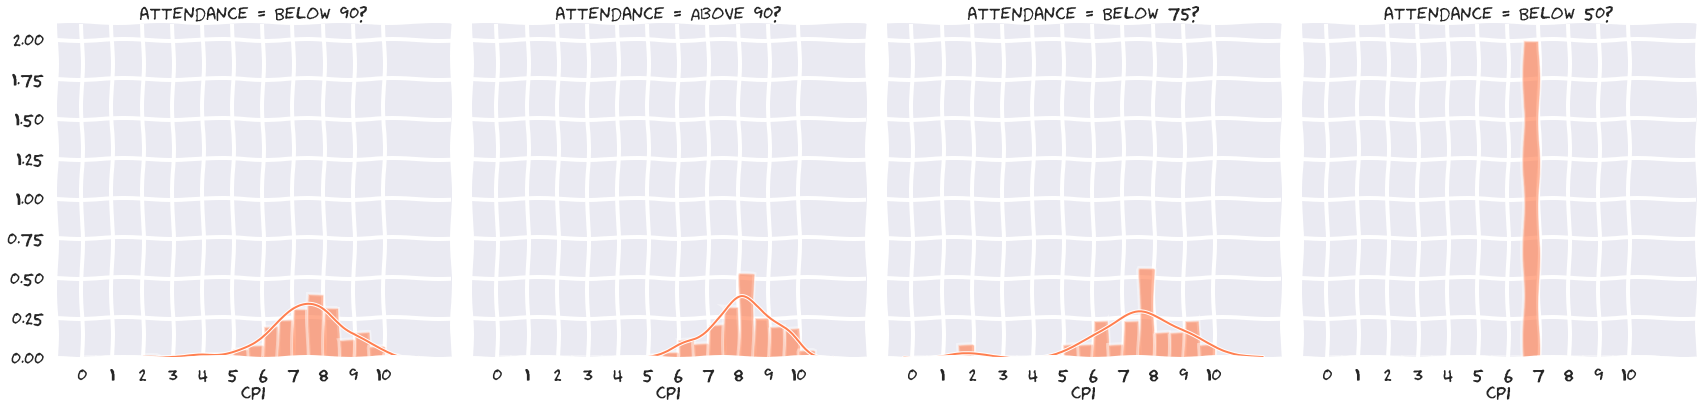

In [36]:
bin_edges=np.arange(0,10+1,0.5)
sns.FacetGrid(data=df,col='attendance',size=6).map(sns.distplot,'cpi',bins=bin_edges,color='coral');
plt.xticks(range(10+1));

In [37]:
df

gender branch dropper tenth_board twelvth_board coaching    coaching_city  \
1     Male   BSBE      No        CBSE          CBSE       No              N.A   
2     Male   BSBE      No        CBSE         State      Yes           Indore   
3     Male     CL      No        CBSE          CBSE      Yes            Patna   
4     Male     CL      No        CBSE          CBSE      Yes            Patna   
5     Male     ME      No        CBSE          CBSE      Yes         Kottayam   
..     ...    ...     ...         ...           ...      ...              ...   
376   Male     MC     Yes        CBSE          CBSE      Yes             Pune   
377   Male     ME      No        CBSE          CBSE      Yes         Kottayam   
378   Male     EP      No        CBSE          CBSE      Yes            Delhi   
379   Male     CE      No        CBSE          CBSE      Yes             Kota   
380   Male   BSBE     Yes        CBSE          CBSE       No  North Lakhimpur   

            coaching_name      home_state        home_city  fam_size  \
1                     N.A       Rajasthan          Bikaner         9   
2                   Allen  Madhya Pradesh        Maheshwar         6   
3                     Vmc           Bihar          Sasaram         4   
4                     Vmc           Bihar          Sasaram         4   
5                 T.I.M.E     Maharashtra         Yavatmal         5   
..                    ...             ...              ...       ...   
376              Dakshana         Gujarat           Rajkot         5   
377                  Time   Uttar Pradesh         Ghazipur         5   
378  Pace Iit And Medical           Delhi            Delhi         4   
379                 Allen       Rajasthan             Kota         4   
380           No Coaching           Assam  North Lakhimpur         4   

            mom_ed         dad_ed    mom_job   dad_job  \
1    Post Graduate  Post Graduate  Housewife  Business   
2         Graduate  Post Graduate  Housewife      Govt   
3        10th Pass       Graduate  Housewife  Business   
4        10th Pass       Graduate  Housewife  Business   
5        10th Pass      12th Pass  Housewife      Else   
..             ...            ...        ...       ...   
376     <10th Pass      10th Pass  Housewife      Else   
377     <10th Pass      12th Pass  Housewife      Else   
378      10th Pass      12th Pass  Housewife      Else   
379      12th Pass      12th Pass  Housewife  Business   
380      12th Pass      12th Pass    Medical      Else   

                  study_time       tech_clubs  cult_clubs       fest  \
1                  Irregular   CnA, Quiz club      Debsoc  Techniche   
2    Everyday upto 2-4 hours        CnA, Aero        None       None   
3                        N.A              CnA        None  Techniche   
4                        N.A              CnA        None  Techniche   
5    Everyday upto 0-2 hours         Robotics        None       None   
..                       ...              ...         ...        ...   
376                Irregular              FEC        None       None   
377  Everyday upto 0-2 hours  Automobile Club        None       None   
378                Irregular             None        None       None   
379                Irregular             None  Drama club       None   
380                Irregular              FEC     Octaves       None   

          hostel intra_hostel ed_loan  time_outside attendance relationship  \
1          Umiam          6-7      No          12.0  Below 90?       Single   
2         Kapili       5 to 6      No           4.0  Above 90?       Single   
3    Brahmaputra            3     Yes           2.0  Below 90?       Single   
4    Brahmaputra            3     Yes           2.0  Below 90?       Single   
5    Brahmaputra        1hour     Yes           3.0  Above 90?       Single   
..           ...          ...     ...           ...        ...          ...   
376        Barak            1     Yes           3.0

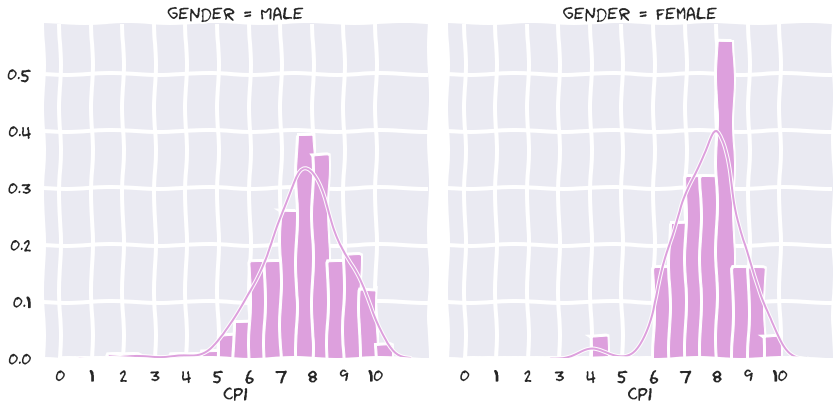

In [38]:
bin_edges=np.arange(0,10+1,0.5)
sns.FacetGrid(data=df,col='gender',size=6).map(sns.distplot,'cpi',bins=bin_edges,color='plum',hist_kws={'alpha':1});
plt.xticks(range(10+1));

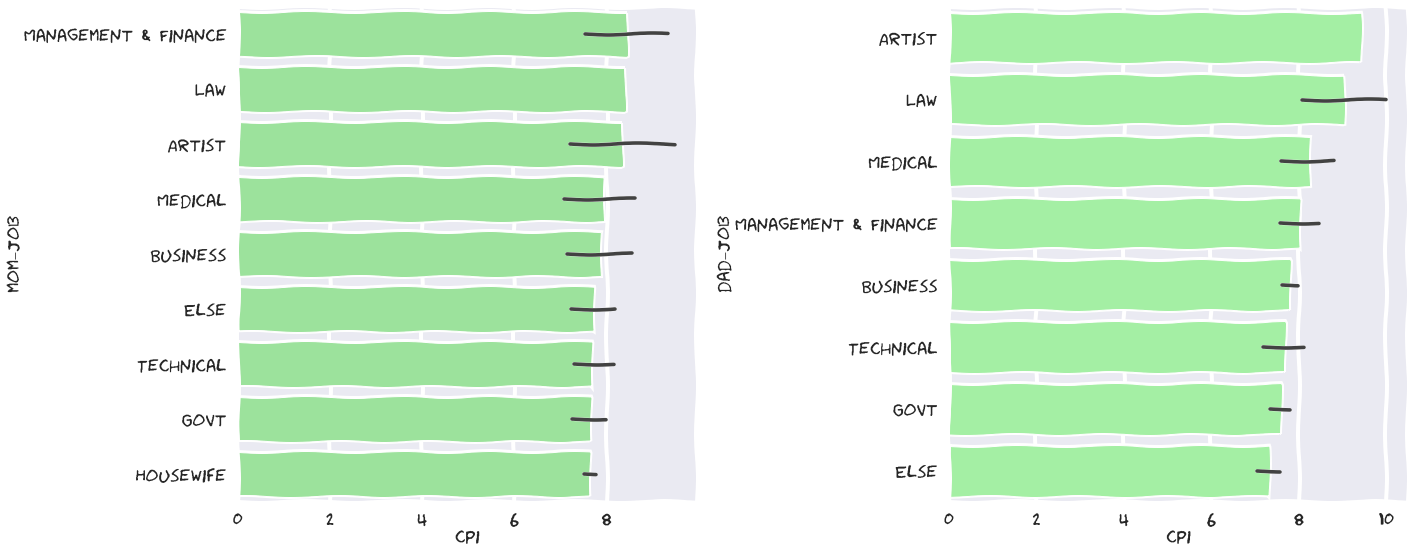

In [39]:
fig,ax=plt.subplots(ncols=2,figsize=(20,8))
sns.barplot(data=df,y='mom_job',x='cpi',order=df.groupby('mom_job').cpi.mean().sort_values(ascending=False).index,ax=ax[0],color='lightgreen');
sns.barplot(data=df,y='dad_job',x='cpi',order=df.groupby('dad_job').cpi.mean().sort_values(ascending=False).index,ax=ax[1],color='palegreen');
plt.tight_layout()

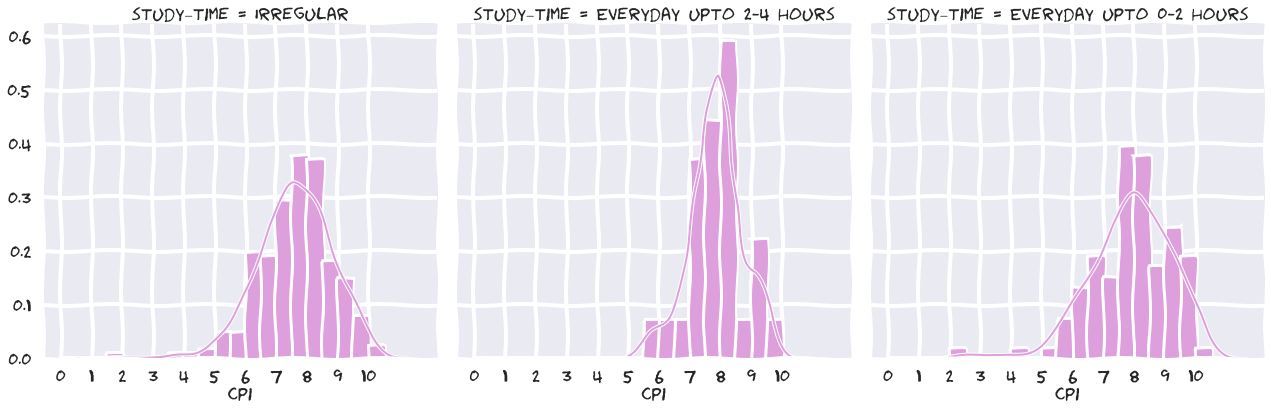

In [40]:
bin_edges=np.arange(0,10+1,0.5)
sns.FacetGrid(data=df[df.study_time!='N.A'],col='study_time',size=6).map(sns.distplot,'cpi',bins=bin_edges,color='plum',hist_kws={'alpha':1});
plt.xticks(range(10+1));

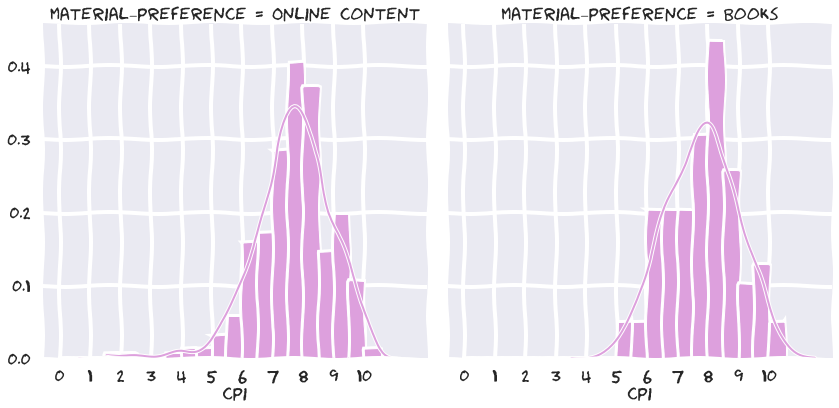

In [41]:
bin_edges=np.arange(0,10+1,0.5)
sns.FacetGrid(data=df,col='material_preference',size=6).map(sns.distplot,'cpi',bins=bin_edges,color='plum',hist_kws={'alpha':1});
plt.xticks(range(10+1));

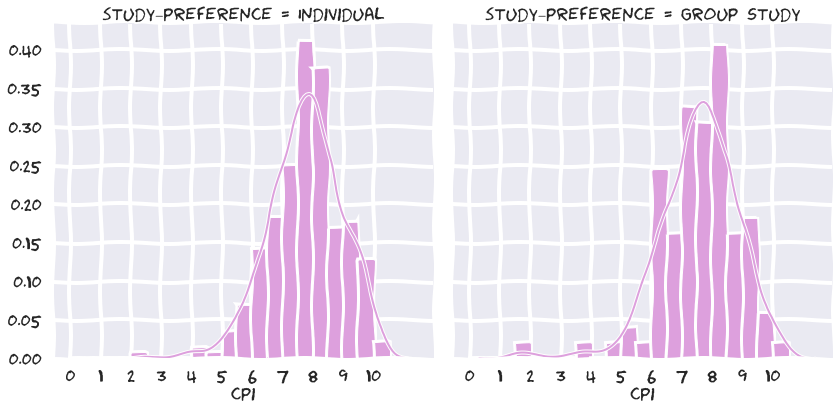

In [42]:
bin_edges=np.arange(0,10+1,0.5)
sns.FacetGrid(data=df,col='study_preference',size=6).map(sns.distplot,'cpi',bins=bin_edges,color='plum',hist_kws={'alpha':1});
plt.xticks(range(10+1));

In [43]:
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

In [44]:
encoder=LabelEncoder()
cats=['gender', 'branch', 'dropper', 'tenth_board', 'twelvth_board',
       'coaching', 'coaching_city', 'coaching_name', 'home_state', 'home_city',
       'fam_size', 'mom_ed', 'dad_ed', 'mom_job', 'dad_job', 'study_time',
       'tech_clubs', 'cult_clubs', 'fest', 'hostel', 'intra_hostel', 'ed_loan',
       'time_outside', 'attendance', 'relationship', 'tv_time', 'library',
       'sleep_time', 'sleep_duration', 'sleep_day', 'addiction', 'study_preference', 'material_preference','core', 'mom_ed_dad_ed']

In [45]:
df_enc=df
for col in cats:
    df_enc[col]=pd.Series(encoder.fit_transform(df[col]),index=df[col].index)

In [46]:
df_enc

gender  branch  dropper  tenth_board  twelvth_board  coaching  \
1         1       0        0            0              0         0   
2         1       0        0            0              2         1   
3         1       2        0            0              0         1   
4         1       2        0            0              0         1   
5         1       9        0            0              0         1   
..      ...     ...      ...          ...            ...       ...   
376       1       8        1            0              0         1   
377       1       9        0            0              0         1   
378       1       7        0            0              0         1   
379       1       1        0            0              0         1   
380       1       0        1            0              0         0   

     coaching_city  coaching_name  home_state  home_city  fam_size  mom_ed  \
1               56             73          20         36         8       4   
2               37              8          14        116         5       3   
3               64            146           4        163         3       0   
4               64            146           4        163         3       0   
5               49            128          16        197         4       0   
..             ...            ...         ...        ...       ...     ...   
376             66             28           9        151         4       2   
377             49            131          23         61         4       2   
378             21             91           8         50         3       0   
379             48              8          20        110         3       1   
380             62             82           3        136         3       1   

     dad_ed  mom_job  dad_job  study_time  tech_clubs  cult_clubs  fest  \
1         4        4        1           2          18           7     5   
2         4        4        3           1           7          18     3   
3         3        4        1           3           6          18     5   
4         3        4        1           3           6          18     5   
5         1        4        2           0          48          18     3   
..      ...      ...      ...         ...         ...         ...   ...   
376       0        4        2           2          33          18     3   
377       1        4        2           0           5          18     3   
378       1        4        2           2          45          18     3   
379       1        4        1           2          45          10     3   
380       1        7        2           2          33          19     3   

     hostel  intra_hostel  ed_loan  time_outside  attendance  relationship  \
1         9            53        0            15           3             2   
2         5            48        0             6           0             2   
3         1            32        1             3           3             2   
4         1            32        1             3           3             2   
5         1            20        1             5           0             2   
..      ...           ...      ...           ...         ...           ...   
376       0             9        1             5           2             2   
377       0            32        0            17           3             1   
378       0            41        1             9           3             0   
379       0            32        1             5           2             2   
380       0            21        0             3           3             2   

     tv_time  library  sleep_time  sleep_duration  sleep_day  addiction  \
1          6        0           4               2          0          3   
2          4        2           4               1          0          3   
3          4        2           4               2          0          3   
4          4        2           4               2          0          3   
5          4  

In [47]:
import plotly
from scipy.cluster import hierarchy as hc
from scipy.stats import spearmanr

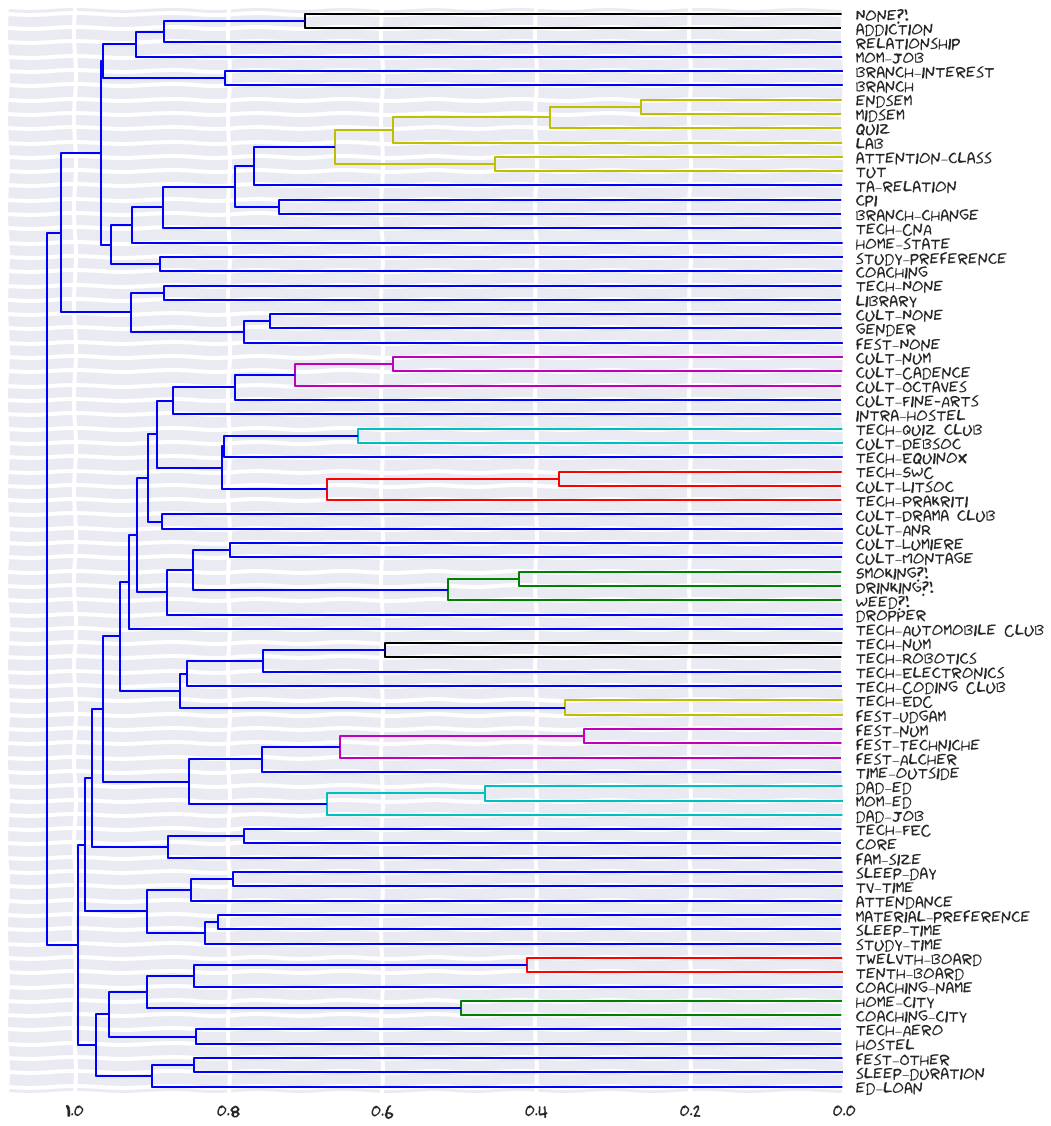

In [48]:
df_enc.drop(['fest','cult_clubs','tech_clubs','mom_ed_dad_ed'],axis=1,inplace=True)

corr=np.round(spearmanr(df_enc).correlation,4)
corr_condensed=hc.distance.squareform(1-corr)
z=hc.linkage(corr_condensed,method='average')
fig=plt.figure(figsize=(15,20))
dendrogram=hc.dendrogram(z,labels=df_enc.columns,orientation='left',leaf_font_size=16)

In [49]:
X,y=df_enc.drop('cpi',axis=1),df['cpi']
X_train,X_vld=X[:200],X[200:]
y_train,y_vld=y[:200],y[200:]

In [50]:
train_data=lgb.Dataset(X_train,label=y_train,free_raw_data=False)
valid_data=lgb.Dataset(X_vld, label=y_vld,free_raw_data=False)
whole_data=lgb.Dataset(X,label=y,free_raw_data=False)

In [51]:
params={}
params['learning_rate']=0.01
params['objective']='regression'
params['metric']='rmse'
params['l2']=0.4
params['metric_freq']=5
params['feature_fraction']=0.7
params['is_training_metric']=True

cpi_model_0=lgb.train(
    params,
    train_data,
    valid_sets=valid_data,
    early_stopping_rounds=100,
    num_boost_round=10000)

[1]	valid_0's rmse: 1.34988
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 1.34773
[3]	valid_0's rmse: 1.34635
[4]	valid_0's rmse: 1.34449
[5]	valid_0's rmse: 1.34263
[6]	valid_0's rmse: 1.34134
[7]	valid_0's rmse: 1.3396
[8]	valid_0's rmse: 1.33822
[9]	valid_0's rmse: 1.33695
[10]	valid_0's rmse: 1.33581
[11]	valid_0's rmse: 1.33414
[12]	valid_0's rmse: 1.33308
[13]	valid_0's rmse: 1.33155
[14]	valid_0's rmse: 1.3297
[15]	valid_0's rmse: 1.32888
[16]	valid_0's rmse: 1.32709
[17]	valid_0's rmse: 1.32548
[18]	valid_0's rmse: 1.32458
[19]	valid_0's rmse: 1.32293
[20]	valid_0's rmse: 1.32153
[21]	valid_0's rmse: 1.32024
[22]	valid_0's rmse: 1.31819
[23]	valid_0's rmse: 1.31673
[24]	valid_0's rmse: 1.31547
[25]	valid_0's rmse: 1.31388
[26]	valid_0's rmse: 1.31336
[27]	valid_0's rmse: 1.31215
[28]	valid_0's rmse: 1.31097
[29]	valid_0's rmse: 1.30963
[30]	valid_0's rmse: 1.30834
[31]	valid_0's rmse: 1.30745
[32]	valid_0's rmse: 1.30636
[33]	valid_0's rmse: 

[282]	valid_0's rmse: 1.19006
[283]	valid_0's rmse: 1.1898
[284]	valid_0's rmse: 1.18998
[285]	valid_0's rmse: 1.19
[286]	valid_0's rmse: 1.18964
[287]	valid_0's rmse: 1.18982
[288]	valid_0's rmse: 1.18979
[289]	valid_0's rmse: 1.18979
[290]	valid_0's rmse: 1.18941
[291]	valid_0's rmse: 1.18958
[292]	valid_0's rmse: 1.1895
[293]	valid_0's rmse: 1.18937
[294]	valid_0's rmse: 1.18938
[295]	valid_0's rmse: 1.1891
[296]	valid_0's rmse: 1.18907
[297]	valid_0's rmse: 1.18884
[298]	valid_0's rmse: 1.18882
[299]	valid_0's rmse: 1.18885
[300]	valid_0's rmse: 1.18865
[301]	valid_0's rmse: 1.18863
[302]	valid_0's rmse: 1.18868
[303]	valid_0's rmse: 1.18887
[304]	valid_0's rmse: 1.18857
[305]	valid_0's rmse: 1.18863
[306]	valid_0's rmse: 1.18866
[307]	valid_0's rmse: 1.18855
[308]	valid_0's rmse: 1.18838
[309]	valid_0's rmse: 1.18811
[310]	valid_0's rmse: 1.1879
[311]	valid_0's rmse: 1.18815
[312]	valid_0's rmse: 1.18797
[313]	valid_0's rmse: 1.18773
[314]	valid_0's rmse: 1.18793
[315]	valid_0's r

In [52]:
# params={}
# params['learning_rate']=0.01
# params['objective']='regression'
# params['metric']='rmse'
# params['l2']=0.4
# params['metric_freq']=5
# params['feature_fraction']=0.7
# params['is_training_metric']=True
# params['verbose']=1

params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'rmse'},
    'is_training_metric': True,
    'metric_freq': 5,
    'num_leaves': 31,
    'learning_rate': 0.02,
    'lambda_l2': 0.0042,
    'feature_fraction': 0.7,
    'bagging_fraction': 1,
    'bagging_freq': 5,
    'verbose': 1,
    'device' : 'cpu',
    'gpu_platform_id' : 0,
    'gpu_device_id' : 0
}

cats=['branch', 'dropper', 'tenth_board', 
    'coaching_city', 'coaching_name', 'home_state', 'home_city',
    'dad_ed', 'dad_job',
    'time_outside', 'attendance',
    'tv_time', 'library', 'sleep_time',
    'material_preference', 'core']

cpi_model=lgb.train(
    params,
    train_data,
    valid_sets=[train_data,valid_data],
    early_stopping_rounds=100,
    num_boost_round=10000,
    categorical_feature=cats
)

[1]	training's rmse: 1.12839	valid_1's rmse: 1.35071
Training until validation scores don't improve for 100 rounds
[2]	training's rmse: 1.12345	valid_1's rmse: 1.34874
[3]	training's rmse: 1.1183	valid_1's rmse: 1.34619
[4]	training's rmse: 1.11298	valid_1's rmse: 1.34368
[5]	training's rmse: 1.10841	valid_1's rmse: 1.34067
[6]	training's rmse: 1.10353	valid_1's rmse: 1.33862
[7]	training's rmse: 1.09982	valid_1's rmse: 1.33692
[8]	training's rmse: 1.09548	valid_1's rmse: 1.33491
[9]	training's rmse: 1.09081	valid_1's rmse: 1.33224
[10]	training's rmse: 1.08682	valid_1's rmse: 1.32991
[11]	training's rmse: 1.08298	valid_1's rmse: 1.32819
[12]	training's rmse: 1.07867	valid_1's rmse: 1.32602
[13]	training's rmse: 1.07509	valid_1's rmse: 1.32391
[14]	training's rmse: 1.07073	valid_1's rmse: 1.32247
[15]	training's rmse: 1.06713	valid_1's rmse: 1.32105
[16]	training's rmse: 1.06308	valid_1's rmse: 1.31927
[17]	training's rmse: 1.05946	valid_1's rmse: 1.31804
[18]	training's rmse: 1.05601	

[166]	training's rmse: 0.753186	valid_1's rmse: 1.27685
[167]	training's rmse: 0.751475	valid_1's rmse: 1.27711
[168]	training's rmse: 0.749922	valid_1's rmse: 1.27786
[169]	training's rmse: 0.748671	valid_1's rmse: 1.27829
[170]	training's rmse: 0.747034	valid_1's rmse: 1.27876
[171]	training's rmse: 0.745995	valid_1's rmse: 1.27901
[172]	training's rmse: 0.744319	valid_1's rmse: 1.27937
[173]	training's rmse: 0.743167	valid_1's rmse: 1.27906
[174]	training's rmse: 0.742175	valid_1's rmse: 1.27933
[175]	training's rmse: 0.741206	valid_1's rmse: 1.27951
[176]	training's rmse: 0.73987	valid_1's rmse: 1.27919
[177]	training's rmse: 0.738595	valid_1's rmse: 1.27961
[178]	training's rmse: 0.737328	valid_1's rmse: 1.27989
[179]	training's rmse: 0.73623	valid_1's rmse: 1.27904
[180]	training's rmse: 0.734692	valid_1's rmse: 1.27928
[181]	training's rmse: 0.733313	valid_1's rmse: 1.27935
[182]	training's rmse: 0.732156	valid_1's rmse: 1.27983
[183]	training's rmse: 0.730491	valid_1's rmse: 1.

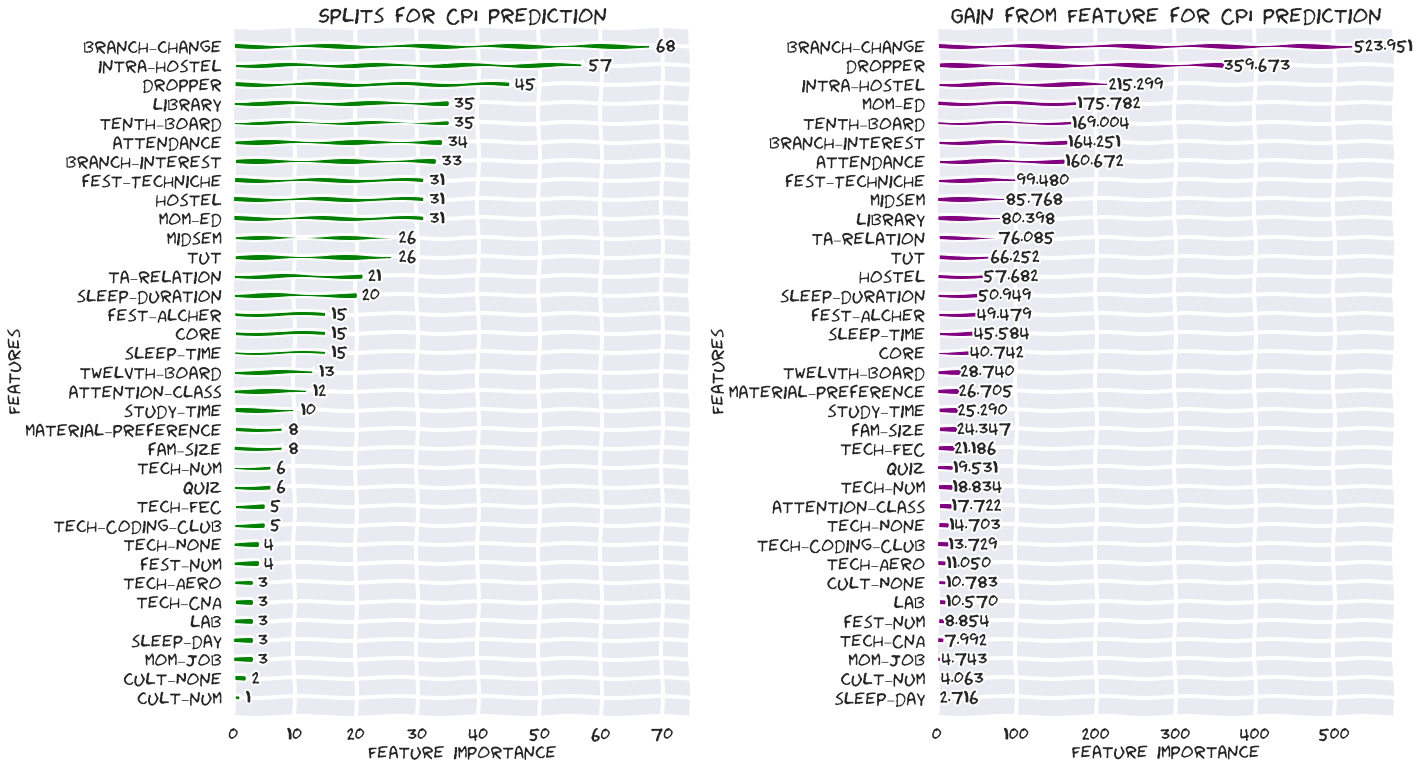

In [53]:
fig,ax=plt.subplots(ncols=2,figsize=(20,11))
lgb.plot_importance(cpi_model,ax=ax[0],importance_type='split',color='green');
ax[0].set_title('Splits for CPI prediction');

lgb.plot_importance(cpi_model,ax=ax[1],importance_type='gain',color='purple',alpha=1);
ax[1].set_title('Gain from Feature for CPI prediction');

plt.tight_layout();

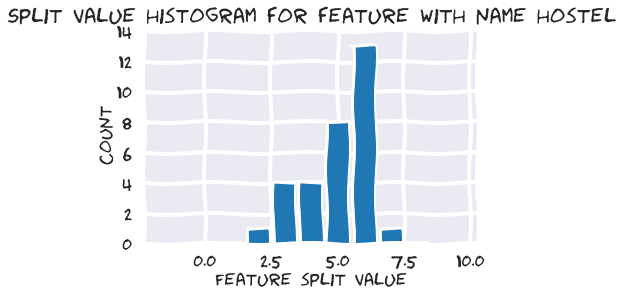

In [54]:
lgb.plot_split_value_histogram(cpi_model,'hostel',bins=np.arange(0-0.5,df_enc.hostel.max()+0.5,1))

In [55]:
df_enc.drop(['cpi'],axis=1).columns[cpi_model.feature_importance()==0]

Index(['gender', 'branch', 'coaching', 'coaching_city', 'coaching_name',
       'home_state', 'home_city', 'dad_ed', 'dad_job', 'ed_loan',
       'time_outside', 'relationship', 'tv_time', 'addiction', 'endsem',
       'study_preference', 'fest_Udgam', 'fest_Other', 'fest_None',
       'cult_Debsoc', 'cult_AnR', 'cult_Cadence', 'cult_Litsoc',
       'cult_Montage', 'cult_Lumiere', 'cult_Octaves', 'cult_Drama club',
       'cult_Fine-Arts', 'tech_Quiz club', 'tech_Robotics', 'tech_Electronics',
       'tech_EDC', 'tech_Equinox', 'tech_SWC', 'tech_Automobile Club',
       'tech_Prakriti', 'Drinking?!', 'Smoking?!', 'Weed?!', 'None?!'],
      dtype='object')

In [56]:
import random
train_index=random.sample(range(0,379),200)

In [57]:
val_index=np.array(list(set(range(1,379)) - set(train_index)))


In [85]:
df_enc.reset_index(inplace=True,drop=True)
# df_enc.drop(['level_0','index'],axis=1,inplace=True)
X_train=df_enc.iloc[train_index].drop(['cpi'],axis=1)
X_valid=df_enc.iloc[val_index].drop('cpi',axis=1)

y_train=df_enc.cpi[train_index]
y_valid=df_enc.cpi[val_index]

train_df=lgb.Dataset(X_train,label=y_train,free_raw_data=False)
valid_df=lgb.Dataset(X_valid,label=y_valid,free_raw_data=False)

In [86]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'rmse'},
    'is_training_metric': True,
    'metric_freq': 5,
#     'num_leaves': 64,
    'learning_rate': 0.005,
    'lambda_l2': 0.01,
    'feature_fraction': 0.74,
    'bagging_fraction': 0.86,
    'bagging_freq': 1,
    'verbose': 1,
#     'min_child_weight':20,
}

cats=['gender', 'dropper',
       'twelvth_board', 'coaching_city',
       'home_state', 'home_city', 'fam_size', 'mom_job',
       'dad_job', 'ed_loan','mom_ed',
       'time_outside', 'attendance','tv_time',
        'sleep_duration', 'sleep_day', 'addiction',
       'material_preference']

cpi_model_1=lgb.train(
    params,
    train_df,
    valid_sets=[train_df,valid_df],
    early_stopping_rounds=50,
    num_boost_round=10000,
    categorical_feature=cats
)

[1]	training's rmse: 1.23343	valid_1's rmse: 1.22729
Training until validation scores don't improve for 50 rounds
[2]	training's rmse: 1.23187	valid_1's rmse: 1.22604
[3]	training's rmse: 1.2303	valid_1's rmse: 1.22495
[4]	training's rmse: 1.229	valid_1's rmse: 1.22422
[5]	training's rmse: 1.22759	valid_1's rmse: 1.22359
[6]	training's rmse: 1.22607	valid_1's rmse: 1.22287
[7]	training's rmse: 1.22469	valid_1's rmse: 1.22218
[8]	training's rmse: 1.22326	valid_1's rmse: 1.22124
[9]	training's rmse: 1.22189	valid_1's rmse: 1.22028
[10]	training's rmse: 1.22029	valid_1's rmse: 1.219
[11]	training's rmse: 1.21898	valid_1's rmse: 1.218
[12]	training's rmse: 1.21777	valid_1's rmse: 1.21734
[13]	training's rmse: 1.21632	valid_1's rmse: 1.21628
[14]	training's rmse: 1.21491	valid_1's rmse: 1.2153
[15]	training's rmse: 1.2136	valid_1's rmse: 1.21487
[16]	training's rmse: 1.21189	valid_1's rmse: 1.2138
[17]	training's rmse: 1.21042	valid_1's rmse: 1.21281
[18]	training's rmse: 1.20884	valid_1's 

[169]	training's rmse: 1.04921	valid_1's rmse: 1.13356
[170]	training's rmse: 1.04855	valid_1's rmse: 1.13316
[171]	training's rmse: 1.04789	valid_1's rmse: 1.13279
[172]	training's rmse: 1.04722	valid_1's rmse: 1.13243
[173]	training's rmse: 1.04642	valid_1's rmse: 1.13233
[174]	training's rmse: 1.04558	valid_1's rmse: 1.13183
[175]	training's rmse: 1.04474	valid_1's rmse: 1.13156
[176]	training's rmse: 1.04387	valid_1's rmse: 1.13107
[177]	training's rmse: 1.04322	valid_1's rmse: 1.13082
[178]	training's rmse: 1.0424	valid_1's rmse: 1.13049
[179]	training's rmse: 1.04185	valid_1's rmse: 1.13028
[180]	training's rmse: 1.04139	valid_1's rmse: 1.13023
[181]	training's rmse: 1.04059	valid_1's rmse: 1.12995
[182]	training's rmse: 1.03988	valid_1's rmse: 1.1298
[183]	training's rmse: 1.03917	valid_1's rmse: 1.12962
[184]	training's rmse: 1.03832	valid_1's rmse: 1.12896
[185]	training's rmse: 1.03754	valid_1's rmse: 1.12875
[186]	training's rmse: 1.03672	valid_1's rmse: 1.12832
[187]	traini

[344]	training's rmse: 0.942942	valid_1's rmse: 1.09852
[345]	training's rmse: 0.942567	valid_1's rmse: 1.09851
[346]	training's rmse: 0.942247	valid_1's rmse: 1.09844
[347]	training's rmse: 0.941849	valid_1's rmse: 1.0983
[348]	training's rmse: 0.941359	valid_1's rmse: 1.09805
[349]	training's rmse: 0.940834	valid_1's rmse: 1.09783
[350]	training's rmse: 0.940396	valid_1's rmse: 1.09768
[351]	training's rmse: 0.939885	valid_1's rmse: 1.09736
[352]	training's rmse: 0.939384	valid_1's rmse: 1.09725
[353]	training's rmse: 0.938871	valid_1's rmse: 1.09704
[354]	training's rmse: 0.93831	valid_1's rmse: 1.09686
[355]	training's rmse: 0.937891	valid_1's rmse: 1.09661
[356]	training's rmse: 0.937503	valid_1's rmse: 1.09651
[357]	training's rmse: 0.937098	valid_1's rmse: 1.09626
[358]	training's rmse: 0.936675	valid_1's rmse: 1.09619
[359]	training's rmse: 0.936252	valid_1's rmse: 1.09613
[360]	training's rmse: 0.935702	valid_1's rmse: 1.09583
[361]	training's rmse: 0.935293	valid_1's rmse: 1.

[498]	training's rmse: 0.878917	valid_1's rmse: 1.08416
[499]	training's rmse: 0.878682	valid_1's rmse: 1.08425
[500]	training's rmse: 0.878291	valid_1's rmse: 1.08426
[501]	training's rmse: 0.877877	valid_1's rmse: 1.08429
[502]	training's rmse: 0.877552	valid_1's rmse: 1.0844
[503]	training's rmse: 0.877243	valid_1's rmse: 1.0844
[504]	training's rmse: 0.877036	valid_1's rmse: 1.08452
[505]	training's rmse: 0.876722	valid_1's rmse: 1.08459
[506]	training's rmse: 0.876323	valid_1's rmse: 1.08461
[507]	training's rmse: 0.875981	valid_1's rmse: 1.08446
[508]	training's rmse: 0.875637	valid_1's rmse: 1.08454
[509]	training's rmse: 0.87535	valid_1's rmse: 1.0846
[510]	training's rmse: 0.874765	valid_1's rmse: 1.08469
[511]	training's rmse: 0.874465	valid_1's rmse: 1.08472
[512]	training's rmse: 0.874131	valid_1's rmse: 1.08481
[513]	training's rmse: 0.87379	valid_1's rmse: 1.08478
[514]	training's rmse: 0.873395	valid_1's rmse: 1.08461
[515]	training's rmse: 0.873088	valid_1's rmse: 1.084

[677]	training's rmse: 0.821293	valid_1's rmse: 1.08026
[678]	training's rmse: 0.821084	valid_1's rmse: 1.08037
[679]	training's rmse: 0.820831	valid_1's rmse: 1.08035
[680]	training's rmse: 0.820639	valid_1's rmse: 1.08052
[681]	training's rmse: 0.820308	valid_1's rmse: 1.08045
[682]	training's rmse: 0.820049	valid_1's rmse: 1.08053
[683]	training's rmse: 0.819837	valid_1's rmse: 1.08069
[684]	training's rmse: 0.819586	valid_1's rmse: 1.08061
[685]	training's rmse: 0.819344	valid_1's rmse: 1.08074
[686]	training's rmse: 0.818975	valid_1's rmse: 1.08048
[687]	training's rmse: 0.818612	valid_1's rmse: 1.08054
[688]	training's rmse: 0.818383	valid_1's rmse: 1.08044
[689]	training's rmse: 0.818115	valid_1's rmse: 1.08051
[690]	training's rmse: 0.817775	valid_1's rmse: 1.08049
[691]	training's rmse: 0.817501	valid_1's rmse: 1.08053
[692]	training's rmse: 0.817162	valid_1's rmse: 1.0803
Early stopping, best iteration is:
[642]	training's rmse: 0.831609	valid_1's rmse: 1.08011


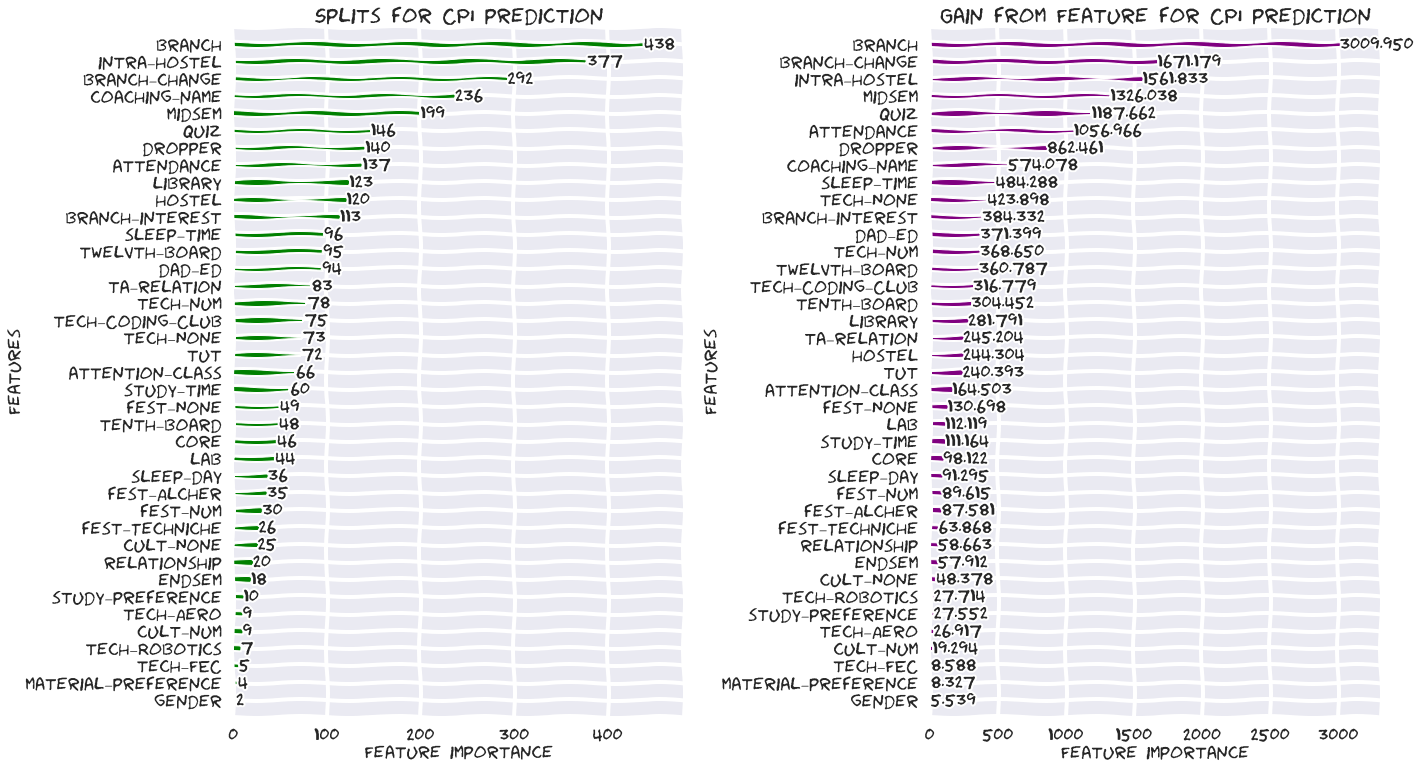

In [60]:
fig,ax=plt.subplots(ncols=2,figsize=(20,11))
lgb.plot_importance(cpi_model_1,ax=ax[0],importance_type='split',color='green');
ax[0].set_title('Splits for CPI prediction');

lgb.plot_importance(cpi_model_1,ax=ax[1],importance_type='gain',color='purple',alpha=1);
ax[1].set_title('Gain from Feature for CPI prediction');

plt.tight_layout();

In [88]:
# from eli5.permutation_importance import get_score_importances
from sklearn.metrics import mean_squared_error as rmse

def score(X, y):
    y_pred = cpi_model_1.predict(X)
    return rmse(y_pred,y, squared=False)

X_valid.reset_index(inplace=True,drop=True)
y_valid.reset_index(inplace=True,drop=True)
# base_score, score_decreases = get_score_importances(score, X_valid, y_valid)
# feature_importances = np.mean(score_decreases, axis=0)

base_score=score(X_valid,y_valid)
fi=pd.Series(index=X_valid.columns)
    
for col in X_valid.columns:
    X_bot=X_valid.copy()
    diff=[]
    curr=X_valid[col].values.copy()
    for _ in range(20):
        random.shuffle(curr)
        X_bot[col]=curr
        now_score=score(X_bot,y_valid)
        diff.append(now_score-base_score)
    fi[col]=np.array(diff).mean()

LightGBMError: The number of features in data (23) is not the same as it was in training data (75).

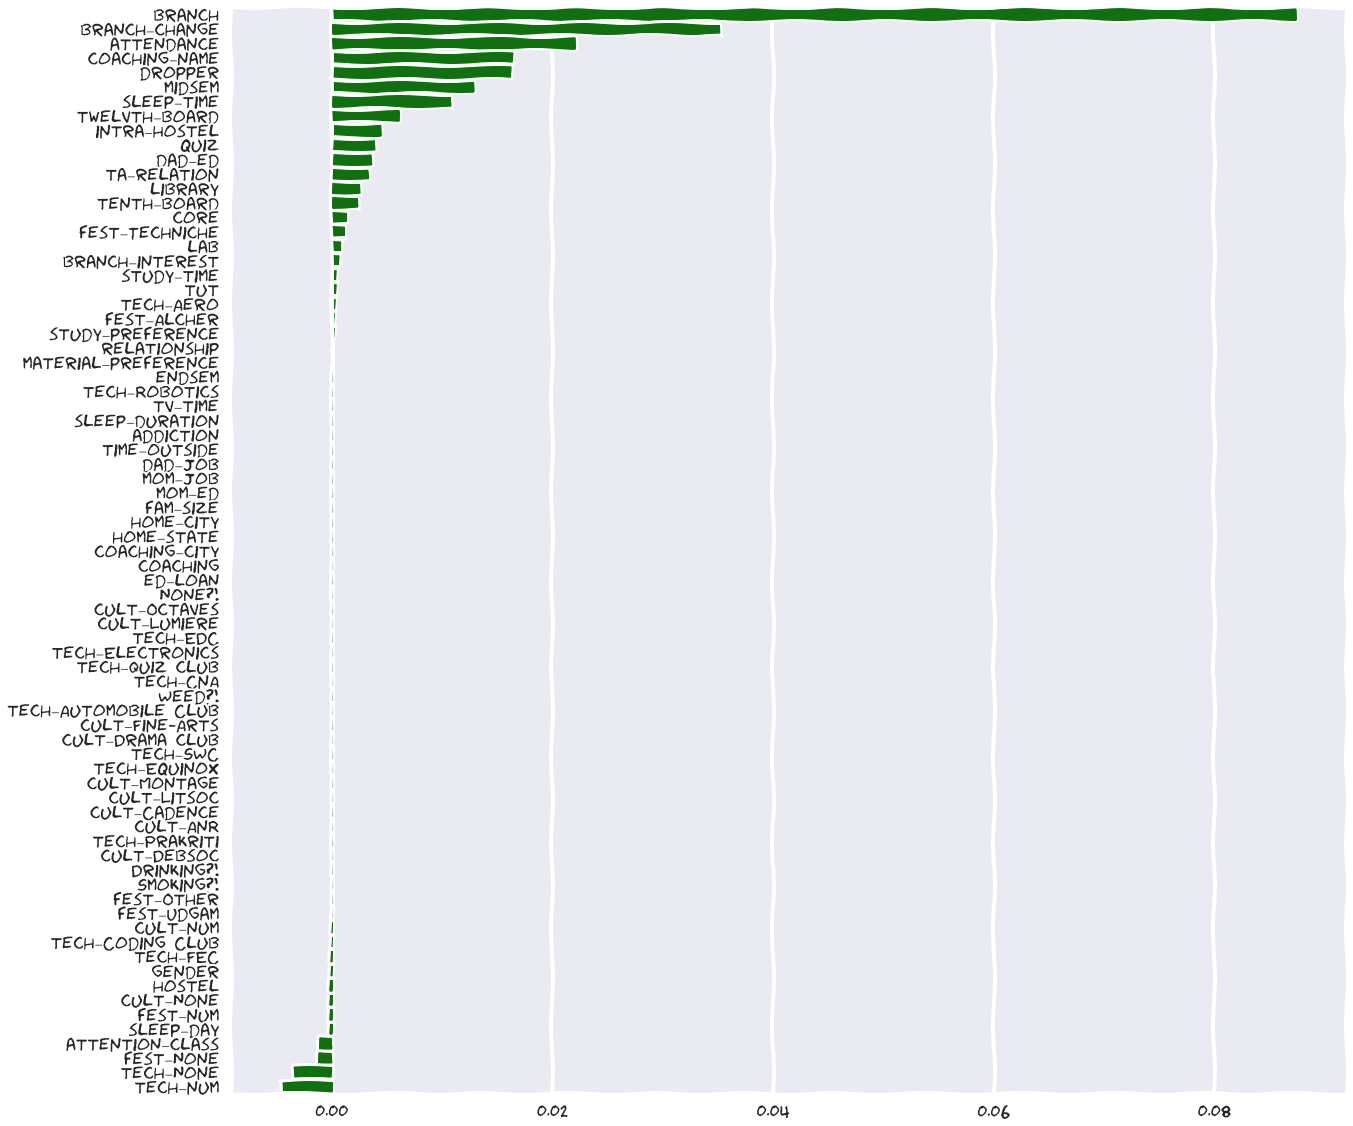

In [62]:
fig,axes=plt.subplots(figsize=(20,20))
sns.barplot(x=fi,y=fi.index,order=fi.sort_values(ascending=False).index,ax=axes,color='green');

In [63]:
fi=pd.Series(index=X_valid.columns)

In [64]:
X_valid['branch']

0      2
1      1
2      7
3      0
4      3
      ..
173    2
174    6
175    6
176    7
177    0
Name: branch, Length: 178, dtype: int32

In [65]:
curr=X_valid['branch'].values.copy()
random.shuffle(curr)

In [66]:
curr

array([4, 1, 0, 0, 3, 5, 5, 4, 7, 7, 1, 0, 7, 6, 4, 3, 8, 1, 3, 6, 6, 3,
       2, 8, 3, 7, 6, 5, 1, 9, 3, 0, 0, 5, 6, 1, 2, 8, 2, 6, 4, 5, 3, 9,
       6, 4, 6, 1, 4, 7, 4, 0, 1, 7, 1, 3, 0, 3, 9, 6, 8, 6, 1, 7, 7, 0,
       3, 5, 8, 8, 4, 9, 0, 1, 6, 2, 1, 6, 7, 6, 8, 6, 1, 6, 1, 3, 9, 6,
       9, 4, 3, 7, 2, 5, 5, 4, 1, 0, 0, 3, 6, 5, 9, 8, 3, 8, 7, 7, 8, 3,
       7, 2, 1, 2, 9, 0, 6, 1, 7, 6, 2, 6, 2, 0, 8, 8, 1, 2, 7, 1, 3, 3,
       4, 5, 2, 4, 2, 9, 2, 9, 7, 3, 5, 9, 7, 2, 2, 4, 1, 3, 3, 1, 6, 7,
       5, 6, 3, 8, 0, 2, 2, 8, 2, 3, 7, 5, 9, 2, 0, 9, 2, 3, 3, 3, 2, 6,
       2, 2])

In [67]:
X_valid['branch']

0      2
1      1
2      7
3      0
4      3
      ..
173    2
174    6
175    6
176    7
177    0
Name: branch, Length: 178, dtype: int32

In [68]:
fi.sort_values(ascending=False).index

Index(['gender', 'branch', 'dropper', 'tenth_board', 'twelvth_board',
       'coaching', 'coaching_city', 'coaching_name', 'home_state', 'home_city',
       'fam_size', 'mom_ed', 'dad_ed', 'mom_job', 'dad_job', 'study_time',
       'hostel', 'intra_hostel', 'ed_loan', 'time_outside', 'attendance',
       'relationship', 'tv_time', 'library', 'sleep_time', 'sleep_duration',
       'sleep_day', 'addiction', 'ta_relation', 'lab', 'tut', 'quiz', 'midsem',
       'endsem', 'branch_change', 'attention_class', 'study_preference',
       'material_preference', 'branch_interest', 'core', 'fest_Alcher',
       'fest_Techniche', 'fest_Udgam', 'fest_Other', 'fest_None', 'fest_num',
       'cult_Debsoc', 'cult_AnR', 'cult_Cadence', 'cult_Litsoc',
       'cult_Montage', 'cult_Lumiere', 'cult_Octaves', 'cult_Drama club',
       'cult_Fine-Arts', 'cult_None', 'cult_num', 'tech_CnA', 'tech_Quiz club',
       'tech_Aero', 'tech_Robotics', 'tech_Coding Club', 'tech_FEC',
       'tech_Electronics', 'tech_

In [87]:
#best validation rmse before dropping study time: 1.32072
#after dropping study time - 1.29927
#core - 1.29457
#endsem - 1.29187
#lab - 1.29094
#fest-num - 1.2907
#library - 1.28756
#intra_hostel - 1.28372
#material_reference - 1.28302
#cult_none, fest_alcher - 1.27972
#cult_num, study_preference - 1.27798

#removing many negative feeding columns -- 1.27319

df_enc.reset_index(inplace=True,drop=True)
# df_enc.drop(['level_0','index'],axis=1,inplace=True)

to_drop=['cpi', 'core',
       'study_time','endsem','lab',
         'fest_num','library', 'intra_hostel',
         'material_preference',
         'cult_None',
         'cult_num', 'study_preference', 'relationship', 'ed_loan', 'sleep_time',
       'tech_FEC', 'tenth_board', 'fest_Udgam', 'fest_Other', 'cult_Debsoc',
       'cult_AnR', 'cult_Cadence', 'cult_Litsoc', 'cult_Montage',
       'cult_Lumiere', 'gender', 'Weed?!', 'cult_Fine-Arts', 'tech_Quiz club',
       'tech_Electronics', 'tech_EDC', 'tech_Equinox', 'tech_SWC',
       'tech_Automobile Club', 'tech_Prakriti', 'Drinking?!', 'Smoking?!',
       'cult_Octaves', 'cult_Drama club', 'None?!', 'coaching_city',
       'home_state', 'home_city', 'addiction', 'fam_size', 'sleep_duration',
       'tv_time', 'time_outside', 'dad_job', 'mom_job','mom_ed',
       'coaching','tech_None',
        ]
X_train=df_enc.iloc[train_index].drop(to_drop,axis=1)
X_valid=df_enc.iloc[val_index].drop(to_drop,axis=1)

y_train=df_enc.cpi[train_index]
y_valid=df_enc.cpi[val_index]

train_df=lgb.Dataset(X_train,label=y_train,free_raw_data=False)
valid_df=lgb.Dataset(X_valid,label=y_valid,free_raw_data=False)

params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'rmse'},
    'is_training_metric': True,
    'metric_freq': 5,
#     'num_leaves': 64,
    'learning_rate': 0.005,
    'lambda_l2': 0.01,
    'feature_fraction': 0.74,
    'bagging_fraction': 0.86,
    'bagging_freq': 1,
    'verbose': 1,
#     'min_child_weight':20,
}

cats=[
#     'gender',
      'dropper',
       'twelvth_board', 
#     'coaching_city',
#        'home_state', 
#     'home_city', 
#     'fam_size',
#     'mom_job',
#        'dad_job', 
#     'ed_loan','mom_ed',
#        'time_outside', 
    'attendance',
#     'tv_time',
#         'sleep_duration', 
    'sleep_day', 
#     'addiction',
#        'material_preference'
     ]

cpi_model_2=lgb.train(
    params,
    train_df,
    valid_sets=[train_df,valid_df],
    early_stopping_rounds=50,
    num_boost_round=10000,
    categorical_feature=cats
)

[1]	training's rmse: 1.23336	valid_1's rmse: 1.22717
Training until validation scores don't improve for 50 rounds
[2]	training's rmse: 1.23175	valid_1's rmse: 1.22643
[3]	training's rmse: 1.23008	valid_1's rmse: 1.2256
[4]	training's rmse: 1.22883	valid_1's rmse: 1.22464
[5]	training's rmse: 1.22744	valid_1's rmse: 1.22403
[6]	training's rmse: 1.22635	valid_1's rmse: 1.22344
[7]	training's rmse: 1.22511	valid_1's rmse: 1.22252
[8]	training's rmse: 1.2237	valid_1's rmse: 1.2214
[9]	training's rmse: 1.22245	valid_1's rmse: 1.22088
[10]	training's rmse: 1.22142	valid_1's rmse: 1.22006
[11]	training's rmse: 1.22009	valid_1's rmse: 1.2191
[12]	training's rmse: 1.21892	valid_1's rmse: 1.21828
[13]	training's rmse: 1.21761	valid_1's rmse: 1.21759
[14]	training's rmse: 1.21621	valid_1's rmse: 1.21674
[15]	training's rmse: 1.21476	valid_1's rmse: 1.21566
[16]	training's rmse: 1.21311	valid_1's rmse: 1.21437
[17]	training's rmse: 1.2119	valid_1's rmse: 1.21356
[18]	training's rmse: 1.21028	valid

[163]	training's rmse: 1.06639	valid_1's rmse: 1.13847
[164]	training's rmse: 1.06549	valid_1's rmse: 1.13806
[165]	training's rmse: 1.06465	valid_1's rmse: 1.13791
[166]	training's rmse: 1.06389	valid_1's rmse: 1.13749
[167]	training's rmse: 1.06312	valid_1's rmse: 1.13707
[168]	training's rmse: 1.06237	valid_1's rmse: 1.13673
[169]	training's rmse: 1.06157	valid_1's rmse: 1.13661
[170]	training's rmse: 1.06077	valid_1's rmse: 1.13634
[171]	training's rmse: 1.06002	valid_1's rmse: 1.13586
[172]	training's rmse: 1.05945	valid_1's rmse: 1.13557
[173]	training's rmse: 1.05873	valid_1's rmse: 1.13522
[174]	training's rmse: 1.05799	valid_1's rmse: 1.13473
[175]	training's rmse: 1.05713	valid_1's rmse: 1.13432
[176]	training's rmse: 1.05648	valid_1's rmse: 1.13408
[177]	training's rmse: 1.0559	valid_1's rmse: 1.13409
[178]	training's rmse: 1.05531	valid_1's rmse: 1.13369
[179]	training's rmse: 1.05473	valid_1's rmse: 1.13356
[180]	training's rmse: 1.05417	valid_1's rmse: 1.13352
[181]	train

[324]	training's rmse: 0.969968	valid_1's rmse: 1.10563
[325]	training's rmse: 0.969431	valid_1's rmse: 1.10554
[326]	training's rmse: 0.969054	valid_1's rmse: 1.10542
[327]	training's rmse: 0.968652	valid_1's rmse: 1.10548
[328]	training's rmse: 0.968093	valid_1's rmse: 1.10555
[329]	training's rmse: 0.967748	valid_1's rmse: 1.10537
[330]	training's rmse: 0.967373	valid_1's rmse: 1.10526
[331]	training's rmse: 0.966911	valid_1's rmse: 1.1052
[332]	training's rmse: 0.96648	valid_1's rmse: 1.10524
[333]	training's rmse: 0.966	valid_1's rmse: 1.10525
[334]	training's rmse: 0.965522	valid_1's rmse: 1.10505
[335]	training's rmse: 0.965118	valid_1's rmse: 1.10495
[336]	training's rmse: 0.964763	valid_1's rmse: 1.10496
[337]	training's rmse: 0.964157	valid_1's rmse: 1.10503
[338]	training's rmse: 0.963725	valid_1's rmse: 1.10478
[339]	training's rmse: 0.963384	valid_1's rmse: 1.10459
[340]	training's rmse: 0.962822	valid_1's rmse: 1.10449
[341]	training's rmse: 0.962397	valid_1's rmse: 1.104

[492]	training's rmse: 0.903541	valid_1's rmse: 1.09299
[493]	training's rmse: 0.903196	valid_1's rmse: 1.09295
[494]	training's rmse: 0.9029	valid_1's rmse: 1.09281
[495]	training's rmse: 0.902619	valid_1's rmse: 1.09281
[496]	training's rmse: 0.902264	valid_1's rmse: 1.09272
[497]	training's rmse: 0.901912	valid_1's rmse: 1.09263
[498]	training's rmse: 0.901694	valid_1's rmse: 1.09265
[499]	training's rmse: 0.901406	valid_1's rmse: 1.09275
[500]	training's rmse: 0.900949	valid_1's rmse: 1.09286
[501]	training's rmse: 0.900617	valid_1's rmse: 1.09284
[502]	training's rmse: 0.900286	valid_1's rmse: 1.09282
[503]	training's rmse: 0.899944	valid_1's rmse: 1.09287
[504]	training's rmse: 0.899634	valid_1's rmse: 1.09283
[505]	training's rmse: 0.899296	valid_1's rmse: 1.09299
[506]	training's rmse: 0.89872	valid_1's rmse: 1.09267
[507]	training's rmse: 0.898425	valid_1's rmse: 1.09266
[508]	training's rmse: 0.897874	valid_1's rmse: 1.09274
[509]	training's rmse: 0.897562	valid_1's rmse: 1.0

[652]	training's rmse: 0.855898	valid_1's rmse: 1.0885
[653]	training's rmse: 0.855669	valid_1's rmse: 1.08852
[654]	training's rmse: 0.855439	valid_1's rmse: 1.08863
[655]	training's rmse: 0.855154	valid_1's rmse: 1.0884
[656]	training's rmse: 0.854938	valid_1's rmse: 1.08815
[657]	training's rmse: 0.854737	valid_1's rmse: 1.08825
[658]	training's rmse: 0.854389	valid_1's rmse: 1.08846
[659]	training's rmse: 0.854185	valid_1's rmse: 1.08861
[660]	training's rmse: 0.853905	valid_1's rmse: 1.08856
[661]	training's rmse: 0.853617	valid_1's rmse: 1.08854
[662]	training's rmse: 0.853344	valid_1's rmse: 1.08837
[663]	training's rmse: 0.853192	valid_1's rmse: 1.08851
[664]	training's rmse: 0.852903	valid_1's rmse: 1.08858
[665]	training's rmse: 0.852638	valid_1's rmse: 1.08852
[666]	training's rmse: 0.852352	valid_1's rmse: 1.08861
[667]	training's rmse: 0.852119	valid_1's rmse: 1.08864
[668]	training's rmse: 0.851869	valid_1's rmse: 1.0887
[669]	training's rmse: 0.851537	valid_1's rmse: 1.0

Wall time: 14.4 s


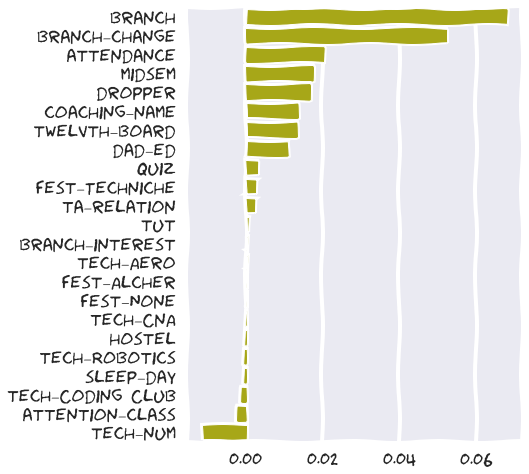

In [70]:
%%time
from sklearn.metrics import mean_squared_error as rmse

def score(X, y):
    y_pred = cpi_model_2.predict(X)
    return rmse(y_pred,y, squared=False)

X_valid.reset_index(inplace=True,drop=True)
y_valid.reset_index(inplace=True,drop=True)
# base_score, score_decreases = get_score_importances(score, X_valid, y_valid)
# feature_importances = np.mean(score_decreases, axis=0)

base_score=score(X_valid,y_valid)
fi=pd.Series(index=X_valid.columns)
for col in X_valid.columns:
    X_bot=X_valid.copy()
    diff=[]
    curr=X_valid[col].values.copy()
    for _ in range(20):
        random.shuffle(curr)
        X_bot[col]=curr
        now_score=score(X_bot,y_valid)
        diff.append(now_score-base_score)
    fi[col]=np.array(diff).mean()
    
fig,axes=plt.subplots(figsize=(6,8))
sns.barplot(x=fi,y=fi.index,order=fi.sort_values(ascending=False).index,ax=axes,color='y');

In [71]:
fi.sort_values().index

Index(['tech_num', 'attention_class', 'tech_Coding Club', 'sleep_day',
       'tech_Robotics', 'hostel', 'tech_CnA', 'fest_None', 'fest_Alcher',
       'tech_Aero', 'branch_interest', 'tut', 'ta_relation', 'fest_Techniche',
       'quiz', 'dad_ed', 'twelvth_board', 'coaching_name', 'dropper', 'midsem',
       'attendance', 'branch_change', 'branch'],
      dtype='object')